<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Análisis de dataset sobre resultados y datos relevantes sobre la liga inglesa de fútbol**

Conjunto de datos sobre los resultados de los partidos de English Premier League. Dataset obtenido de datahub https://datahub.io/core/english-premier-league#readme, estos datos son obtenidos de la página de fútbol del Reino Unido. Disponible en http://www.football-data.co.uk/.

Este conjunto de datos proporciona información estadística sobre los partidos de la EPL desde la temporada 1993/1994 hasta la actualidad, con actualizaciones diarias para garantizar los resultados más precisos y puntuales.

En este análisis, se va a explorar un conjunto de datos de la Premier League inglesa con el objetivo de obtener información valiosa sobre el desempeño de los equipos, las tendencias de juego y los factores que influyen en los resultados de los partidos. A través de técnicas de análisis de datos y visualización, se busca responder preguntas clave como:

*   ¿Cuáles son los equipos más dominantes?
*   ¿Qué equipo tiene más probabilidades de ganar un partido dado?
*   ¿Qué factores estadísticos son los mejores predictores del resultado de un partido?
*   ¿Cuáles son los equipos más consistentes a lo largo de las temporadas?
*   ¿Cómo afecta el calendario de partidos (días de la semana, hora) los resultados?
*   ¿Hay alguna ventaja de jugar en casa que vaya más allá de los factores estadísticos? ¿Los equipos suelen obtener mejores resultados cuando juegan en casa?
*   ¿Qué factores influyen en el número de tarjetas amarillas y rojas?
*   ¿Se puede construir un modelo para predecir los resultados de los partidos con una precisión aceptable para las apuestas deportivas?

Adicional la página donde se obtuvieron los datos nos ofrece algunas ideas para analizar del dataset que son:
*   **Análisis por temporadas:** Compara el total de goles marcados a lo largo de las temporadas.
*   **Rendimiento del equipo:** Identificar las tendencias de las victorias locales y visitantes.
*   **Perspectivas disciplinarias:** Analiza los patrones de tarjetas amarillas/rojas a lo largo del tiempo.
*   **Predicciones de partidos:** Construye un modelo de aprendizaje automático para predecir resultados.

Los hallazgos de este análisis podrían ser de gran interés para aficionados, analistas deportivos, casas de apuestas y clubes de fútbol que buscan una ventaja competitiva y predecir el resultado del partido es la aplicación más directa para las casas de apuestas y para los aficionados que buscan información para tomar decisiones sobre sus apuestas. También es útil para los clubes de fútbol que buscan analizar el rendimiento de sus equipos y de sus rivales.

Para este dataset se cuentan con 32 archivos, uno por cada año, para el análisis solo se tomarán los datos desde el año 2000 a la actualidad debido a que en los años 1993-1999 no se registran la mayoría de los valores de las columnas lo cual afectará el proceso de análisis, por lo cual se tomarán solo 25 archivos y para facilidad de procesamiento se agruparán todos en un solo archivo.

## Cargar las librerías necesarias

Para el proceso de análisis se requieren utilizar las siguientes librerías:

In [151]:
#Librerías necesarias para el proceso de análisis
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

%matplotlib inline
sns.set()

Y las versiones con las cuales se ejecutó el análisis son:

In [2]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.11.11
NumPy 1.26.4
Pandas 2.2.2
Matplotlib 3.10.0
Seaborn 0.13.2


## Cargar el dataset de trabajo

Se descarga el dataset de los resultados de la English Premier League dentro de la variable "***dataset_EPL***":

In [3]:
# Permite visualizar todas las columnas del dataframe
pd.options.display.max_columns = 100

# Carga del dataset con formato csv y delimitador ','
dataset_EPL = pd.read_csv('https://github.com/Camiko0/Analisis-Dataset-EPL/blob/main/season-0125.csv?raw=true', delimiter=',')

dataset_EPL.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,19/08/00,Charlton,Man City,4,0,H,2,0,H,Rob Harris,17,8,14,4,13,12,6,6,1,2,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,17,12,10,5,19,14,7,7,1,2,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,6,16,3,9,15,21,8,4,5,3,1,0
3,19/08/00,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,6,13,4,6,11,13,5,8,1,1,0,0
4,19/08/00,Leeds,Everton,2,0,H,2,0,H,Dermot Gallagher,17,12,8,6,21,20,6,4,1,3,0,0
5,19/08/00,Leicester,Aston Villa,0,0,D,0,0,D,Mike Riley,5,5,4,3,12,12,5,4,2,3,0,0
6,19/08/00,Liverpool,Bradford,1,0,H,0,0,D,Paul Durkin,16,3,10,2,8,8,6,1,1,1,0,0
7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,D,Steve Dunn,8,14,2,7,10,21,2,9,3,1,0,1
8,19/08/00,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,20,15,6,5,14,13,3,4,0,0,0,0
9,20/08/00,Man United,Newcastle,2,0,H,1,0,H,Steve Lodge,19,9,9,6,7,13,7,1,0,1,0,0


In [ ]:
# Dimensiones del dataframe
dataset_EPL.shape

(9339, 22)

In [ ]:
# Resumen de las variables del dataframe
dataset_EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      9339 non-null   object
 1   HomeTeam  9339 non-null   object
 2   AwayTeam  9339 non-null   object
 3   FTHG      9339 non-null   int64 
 4   FTAG      9339 non-null   int64 
 5   FTR       9339 non-null   object
 6   HTHG      9339 non-null   int64 
 7   HTAG      9339 non-null   int64 
 8   HTR       9339 non-null   object
 9   Referee   9339 non-null   object
 10  HS        9339 non-null   int64 
 11  AS        9339 non-null   int64 
 12  HST       9339 non-null   int64 
 13  AST       9339 non-null   int64 
 14  HF        9339 non-null   int64 
 15  AF        9339 non-null   int64 
 16  HC        9339 non-null   int64 
 17  AC        9339 non-null   int64 
 18  HY        9339 non-null   int64 
 19  AY        9339 non-null   int64 
 20  HR        9339 non-null   int64 
 21  AR        9339

De la carga y visualización general de los datos con la propiedad ***dataset_EPL.shape*** se pueden ser un total de 9.339 registros y con 22 columnas. Además con ***dataset_EPL.info()*** vemos la estructura general de los datos donde 16 es de tipo numérico y los 6 restantes de tipo alfanumérico.

# FASE 1: Análisis de las variables

## Análisis Univariado

De acuerdo a la visualización anterior se va a hacer una revisión más detallada de los datos del dataset.

|Nombre de la variable|Descripción|Tipología estadística|Tipología computacional|
|---|---|---|---|
|Date|Fecha del juego en formato dd/mm/yy|Cualitativa nominal|str|
|HomeTeam|Equipo local|Cualitativa nominal|str|
|AwayTeam|Equipo visitante|Cualitativa nominal|str|
|FTHG|Goles del equipo local a tiempo completo|Cuantitativa discreta|int|
|FTAG|Goles del equipo visitante a tiempo completo|Cuantitativa discreta|int|
|FTR|Resultado a tiempo completo (H=Victoria local, D=Empate, A=Victoria visitante)|Cualitativa nominal|str|
|HTHG|Goles del equipo local en el descanso|Cuantitativa discreta|int|
|HTAG|Goles del equipo visitante en el descanso|Cuantitativa discreta|int|
|HTR|Resultado en el descanso (H=Victoria local, D=Empate, A=Victoria visitante)|Cualitativa nominal|str|
|Referee|Árbitro del partido|Cualitativa nominal|str|
|HS|Disparos del equipo local|Cuantitativa discreta|int|
|AS|Disparos del equipo visitante|Cuantitativa discreta|int|
|HST|Tiros a puerta del equipo local|Cuantitativa discreta|int|
|AST|Tiros a puerta del equipo visitante|Cuantitativa discreta|int|
|HF|Faltas cometidas por el equipo local|Cuantitativa discreta|int|
|AF|Faltas cometidas por el equipo visitante|Cuantitativa discreta|int|
|HC|Saques de esquina del equipo local|Cuantitativa discreta|int|
|AC|Saques de esquina del equipo visitante|Cuantitativa discreta|int|
|HY|Tarjetas Amarillas del equipo local|Cuantitativa discreta|int|
|AY|Tarjetas Amarillas del equipo visitante|Cuantitativa discreta|int|
|HR|Tarjetas Rojas del equipo local|Cuantitativa discreta|int|
|AR|Tarjetas Rojas del equipo visitante|Cuantitativa discreta|int|

Al revisar las 22 columnas podemos seleccionar las variables que mas pueden tener impacto en el analisis, las cuales son: *HomeTeam, AwayTeam, FTHG, FTAG, FTR, HST, AST.*

Se va a realizar un resumen estadístico para estas variables y sacar información sobre esto.

In [4]:
# Filtrar y describir las 3 variables cualitativas del dataset a analizar
columnasCualitativas = ['HomeTeam', 'AwayTeam', 'FTR']
dataset_EPL[columnasCualitativas].describe()

,HomeTeam,AwayTeam,FTR
count,9339,9339,9339
unique,46,46,3
top,Man United,Tottenham,H
freq,468,467,4281


**Análisis**

|Nombre de la variable|Valores únicos|Moda|Frecuencia|
|---|---|---|---|
|HomeTeam|46 equipos diferentes|Man United|468 veces|
|AwayTeam|46 equipos diferentes|Tottenham|467 veces|
|FTR|3 resultados del partido (H=Victoria local, D=Empate, A=Victoria visitante)|H=Victoria local|4281 veces|

In [5]:
# Filtrar y describir las 4 variables cuantitativas del dataset a analizar
columnasCuantitativas = ['FTHG', 'FTAG', 'HST', 'AST']
dataset_EPL[columnasCuantitativas].describe()

,FTHG,FTAG,HST,AST
count,9339.000000,9339.000000,9339.000000,9339.000000
mean,1.535925,1.180854,6.005782,4.705750
std,1.305732,1.158167,3.274604,2.757288
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,3.000000
50%,1.000000,1.000000,6.000000,4.000000
75%,2.000000,2.000000,8.000000,6.000000
max,9.000000,9.000000,24.000000,20.000000


**Análisis**

|Nombre de la variable|Rango|Es simétrica|Hay atípicos|Los valores son lógicos|
|---|---|---|---|---|
|FTHG|0.0 - 9.0|No, debido a que el promedio y la mediana están separadas|Si, porque hay un valor máximo lejano (9.0) del quartil 75%|Si, al ser goles pueden tomar cualquier valor entero positivo o puede ser 0|
|FTAG|0.0 - 9.0|Si, debido a que el promedio y la mediana son cercanas y al ser de tipo cuantitativa discreta se aproxima al promedio|Si, porque hay un valor máximo lejano (9.0) del quartil 75%|Si, al ser goles pueden tomar cualquier valor entero positivo o puede ser 0|
|HST|0.0 - 24.0|Si, debido a que el promedio y la mediana son cercanas y al ser de tipo cuantitativa discreta se aproxima al promedio|Si, porque hay un valor máximo lejano (24.0) del quartil 75%|Si, al ser tiros al arco pueden tomar cualquier valor entero positivo o puede ser 0|
|AST|0.0 - 20.0|No, debido a que el promedio y la mediana están separadas|Si, porque hay un valor máximo lejano (20.0) del quartil 75%|Si, al ser tiros al arco pueden tomar cualquier valor entero positivo o puede ser 0|

### Visualizaciones variables cualitativas

Ahora con el análisis general se va a revisar la variable objetivo ***'FTR'*** (Resultado a tiempo completo), también las variables ***'HomeTeam'*** (Equipo local) y ***'AwayTeam'*** (Equipo visitante).

#### Barplots

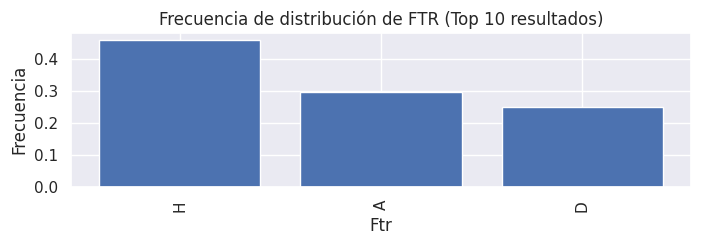

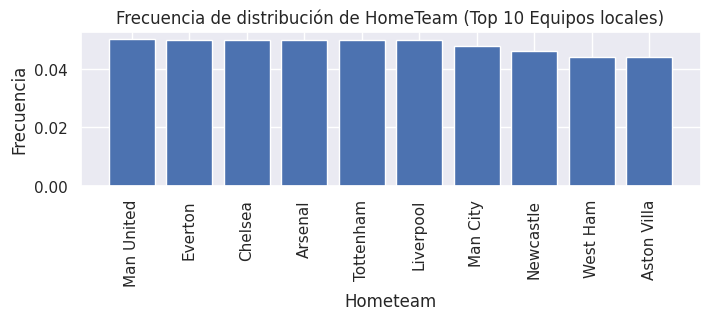

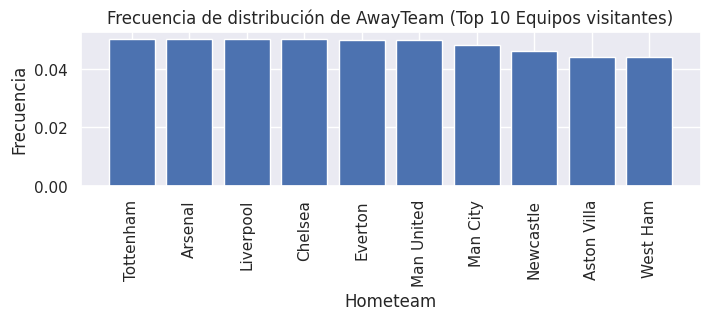

In [6]:
# Variables cualitativas
columnas = ['FTR', 'HomeTeam', 'AwayTeam']
# Ver el top 10
num_values = 10

# Se calcula la frecuencia de cada variable
frequency_ftr = dataset_EPL[columnas[0]].value_counts() / len(dataset_EPL)
frequency_home_team = dataset_EPL[columnas[1]].value_counts() / len(dataset_EPL)
frequency_away_team = dataset_EPL[columnas[2]].value_counts() / len(dataset_EPL)

# Filtrar solo los primeros valores
filtered_frequency_ftr = frequency_ftr[:num_values]
filtered_frequency_home_team = frequency_home_team[:num_values]
filtered_frequency_away_team = frequency_away_team[:num_values]

# Crear un bar plot de 'FTR'
plt.figure(figsize=(8, 2))
plt.bar(filtered_frequency_ftr.index, filtered_frequency_ftr.values)
plt.xlabel(columnas[0].capitalize())
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de distribución de {columnas[0]} (Top {num_values} resultados)')
plt.xticks(rotation=90)

# Crear un bar plot de 'HomeTeam'
plt.figure(figsize=(8, 2))
plt.bar(filtered_frequency_home_team.index, filtered_frequency_home_team.values)
plt.xlabel(columnas[1].capitalize())
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de distribución de {columnas[1]} (Top {num_values} Equipos locales)')
plt.xticks(rotation=90)

# Crear un bar plot de 'AwayTeam'
plt.figure(figsize=(8, 2))
plt.bar(filtered_frequency_away_team.index, filtered_frequency_away_team.values)
plt.xlabel(columnas[1].capitalize())
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de distribución de {columnas[2]} (Top {num_values} Equipos visitantes)')
plt.xticks(rotation=90)

# Mostrar la figura
plt.show()

In [ ]:
print('Valores de frecuencia para variable "FTR"')
print(filtered_frequency_ftr)
print('----------------------------------------------')
print('\nValores de frecuencia para variable "HomeTeam"')
print(filtered_frequency_home_team)
print('----------------------------------------------')
print('\nValores de frecuencia para variable "AwayTeam"')
print(filtered_frequency_away_team)

Valores de frecuencia para variable "FTR"
FTR
H    0.458400
A    0.293822
D    0.247778
Name: count, dtype: float64
----------------------------------------------

Valores de frecuencia para variable "HomeTeam"
HomeTeam
Man United     0.050112
Everton        0.050005
Chelsea        0.050005
Arsenal        0.050005
Tottenham      0.050005
Liverpool      0.049898
Man City       0.047864
Newcastle      0.045936
West Ham       0.044009
Aston Villa    0.043902
Name: count, dtype: float64
----------------------------------------------

Valores de frecuencia para variable "AwayTeam"
AwayTeam
Tottenham      0.050005
Arsenal        0.050005
Liverpool      0.050005
Chelsea        0.050005
Everton        0.049898
Man United     0.049898
Man City       0.048078
Newcastle      0.045936
Aston Villa    0.043902
West Ham       0.043795
Name: count, dtype: float64


#### Análisis gráficas

**Análisis barplots**

|Nombre de la variable|Valor frecuente|Frecuencia|
|---|---|---|
|FTR|H (Victoria local)|0.458400|
|HomeTeam|Man United|0.050112|
|AwayTeam|Tottenham|0.050005|

De las graficas realizadas y revisando la frecuencia de los datos de cada variable cualitativa, tenemos la siguiente información:

*   **FTR:** Para el resultado del partido a tiempo completo se ve que el resultado que más se repite en ***H (Victoria local)*** lo que quiere decir que los equipos que juegan como local tienen más probabilidad de ganar con un valor de ***%45,48***.
*   **HomeTeam y AwayTeam:** Al ver los valores de frecuencia anteriores se ven que ***los primeros 6 equipos*** en la lista tienen valores muy similares y cercanos a ***0.050*** si lo redondeamos a 3 decimales. Tanto para HomeTeam como AwayTeam los 6 equipos son los mismos y al revisar desde el año 2000 a la actualidad corresponden a los 6 equipos que se han mantenido más tiempo en la primera división de Inglaterra por lo cual han jugado más partidos y tienen las frecuencias más altas para estas 2 variables.
*   **Top de la lista:** De este análisis inicial podemos ver 6 equipos que se encuentran como el top de la lista tanto como equipos locales y visitantes en la cantidad de juegos, estos son: **Man United, Everton, Chelsea, Arsenal, Tottenham y Liverpool seguido por el Man City.**

### Visualizaciones variables cuantitativas




Ahora con el análisis general se van a revisar las variables que afectan a nuestra variable objetiva que serían ***FTHG*** (Goles del equipo local), ***FTAG*** (Goles del equipo visitante), ***'HST'*** (Tiros a puerto del equipo local) y ***'AST'*** (Tiros a puerto del equipo visitante). Como parte del análisis se construirá un histograma y un boxplot para conocer su distribución y determinar su forma, simetría y atípicos.

#### Histogramas

In [8]:
# Función para calcular la kurtosis y skew de varias columnas de un dataset
def analizar_kurtosis_skew_columnas(data: pd.DataFrame, columnas: list) -> list:
    kurtosis = []
    skewness = []
    for columna in columnas:
        kurtosis.append(data[columna].kurtosis())
        skewness.append(data[columna].skew())
    return kurtosis, skewness

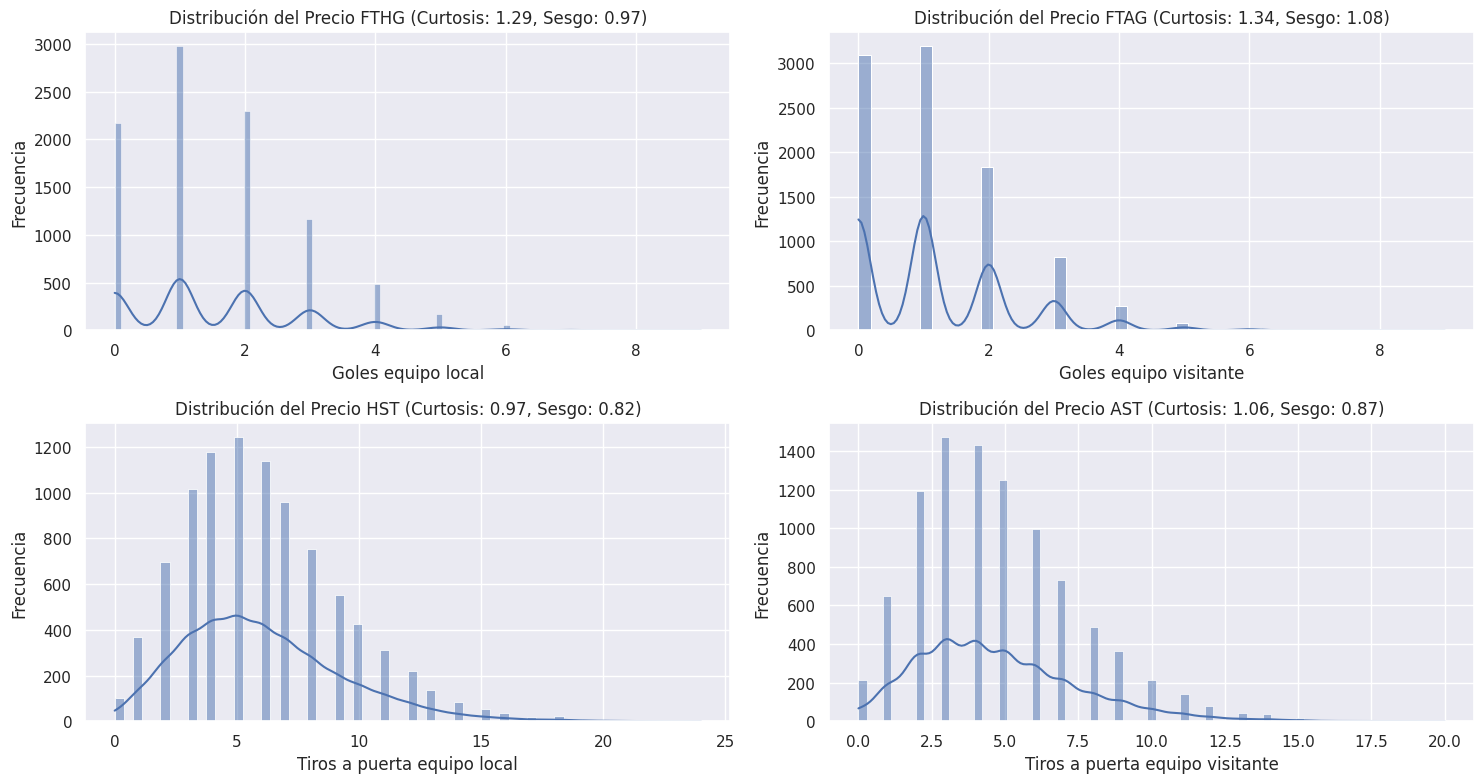

In [9]:
# La curtosis determina la forma de la curva y que tanta cola tiene la distribución
# Hay 3 tipos: Leptocúrtica (Positivo - Campana concentrada en la media),
# Platicúrtica (Negativo - Campana poco concentrada en la media) y Mesocúrtica (0 - Campana normal)

# El sesgo determina si la distribución tiene una cola hacia la izquierda, derecha o simétrica
# Hay 3 tipos: Positivo (Sesgo a la derecha), Negativo (Sesgo a la izquierda)
# y 0 (Simétrico)

# Crear una figura con 4 subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Calcular la curtosis y el sesgo para cada variable
columnas = ['FTHG', 'FTAG', 'HST', 'AST']
kurtosis, skewness = analizar_kurtosis_skew_columnas(dataset_EPL, columnas)

# Crear el histograma sobre cada variable 'FTHG', 'FTAG', 'HST', 'AST'
# kde probabilidad de densidad que muestra una curva de distribución de datos
sns.histplot(dataset_EPL['FTHG'], ax=axes[0,0], kde=True)
axes[0,0].set_title(f'Distribución del Precio FTHG (Curtosis: {kurtosis[0]:.2f}, Sesgo: {skewness[0]:.2f})')
axes[0,0].set_xlabel('Goles equipo local')
axes[0,0].set_ylabel('Frecuencia')

sns.histplot(dataset_EPL['FTAG'], ax=axes[0,1], kde=True)
axes[0,1].set_title(f'Distribución del Precio FTAG (Curtosis: {kurtosis[1]:.2f}, Sesgo: {skewness[1]:.2f})')
axes[0,1].set_xlabel('Goles equipo visitante')
axes[0,1].set_ylabel('Frecuencia')

sns.histplot(dataset_EPL['HST'], ax=axes[1,0], kde=True)
axes[1,0].set_title(f'Distribución del Precio HST (Curtosis: {kurtosis[2]:.2f}, Sesgo: {skewness[2]:.2f})')
axes[1,0].set_xlabel('Tiros a puerta equipo local')
axes[1,0].set_ylabel('Frecuencia')

sns.histplot(dataset_EPL['AST'], ax=axes[1,1], kde=True)
axes[1,1].set_title(f'Distribución del Precio AST (Curtosis: {kurtosis[3]:.2f}, Sesgo: {skewness[3]:.2f})')
axes[1,1].set_xlabel('Tiros a puerta equipo visitante')
axes[1,1].set_ylabel('Frecuencia')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#### Boxplots

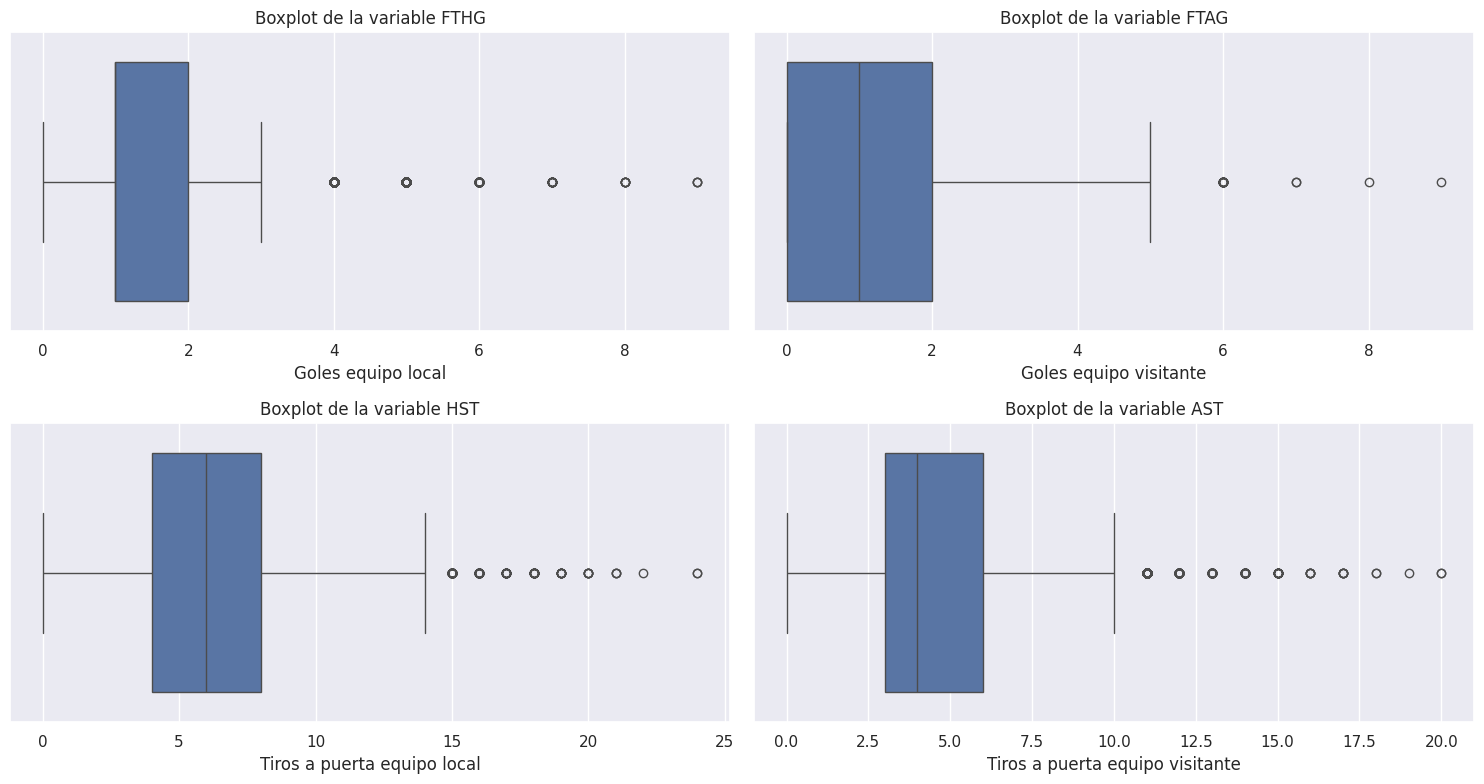

In [10]:
# Crear una figura con 4 subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Crear el boxplot horizontal para cada variable 'FTHG', 'FTAG', 'HST', 'AST'
sns.boxplot(x=dataset_EPL['FTHG'], ax=axes[0,0])
axes[0,0].set_title('Boxplot de la variable FTHG')
axes[0,0].set_xlabel('Goles equipo local')

sns.boxplot(x=dataset_EPL['FTAG'], ax=axes[0,1])
axes[0,1].set_title('Boxplot de la variable FTAG')
axes[0,1].set_xlabel('Goles equipo visitante')

sns.boxplot(x=dataset_EPL['HST'], ax=axes[1,0])
axes[1,0].set_title('Boxplot de la variable HST')
axes[1,0].set_xlabel('Tiros a puerta equipo local')

sns.boxplot(x=dataset_EPL['AST'], ax=axes[1,1])
axes[1,1].set_title('Boxplot de la variable AST')
axes[1,1].set_xlabel('Tiros a puerta equipo visitante')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Análisis gráficas

**Análisis histogramas y boxplots**

|Nombre de la variable|Mediana|Media|Simetría|Curtosis|Sesgo|Valores atípicos|
|---|---|---|---|---|---|---|
|FTHG|1.0|1.535925|Asimétrico (Distribución hacia la derecha)|Leptocúrtica (Campana concentrada en la media)|A la derecha|Si, a partir de 4 goles|
|FTAG|1.0|1.180854|Asimétrico (Distribución hacia la derecha)|Leptocúrtica (Campana concentrada en la media)|A la derecha|Si, a partir de 6 goles|
|HST|6.0|6.005782|Asimétrico (Distribución hacia la derecha)|Leptocúrtica (Campana concentrada en la media)|A la derecha|Si, a partir de 15 tiros|
|AST|4.0|4.705750|Asimétrico (Distribución hacia la derecha)|Leptocúrtica (Campana concentrada en la media)|A la derecha|Si, a partir de 11 tiros|

De las gráficas realizadas se puede observar que las 4 variables tienen comportamientos similares, son asimétricas y su campana esta concentrada en la media con sesgo a la derecha y con valores atípicos. De esta configuración vemos que la mayoría de datos está agrupado en la mediana y hacia los valores menores, de lo cual los goles están entre 0 y 5 goles y 0 y 14 tiros a puerta, los valores ubicados hacia la derecha de estos rangos son los atípicos que se dan solo en ciertos partidos dentro de la Primer League.

## Análisis multivariado

### Barplots

Se ha realizado un análisis de varias variables, ahora se van a buscar relaciones entre estas con el análisis multivariado.

#### Tarjetas amarillas

In [11]:
# Agrupar por variables por tarjetas amarillas del partido
estadisticas_agrupadas_tarjetas_amarillas = dataset_EPL.groupby(['FTR'])[['HY','AY']].agg(['min', 'max', 'mean', 'median'])

print('Estadisticas de tarjetas amarillas')
print(estadisticas_agrupadas_tarjetas_amarillas)

Estadisticas de tarjetas amarillas
     HY                       AY                     
    min max      mean median min max      mean median
FTR                                                  
A     0   6  1.631195    1.0   0   8  1.682945    2.0
D     0   7  1.566119    1.0   0   9  1.904494    2.0
H     0   7  1.299229    1.0   0   7  1.788834    2.0


<Figure size 1200x1200 with 0 Axes>

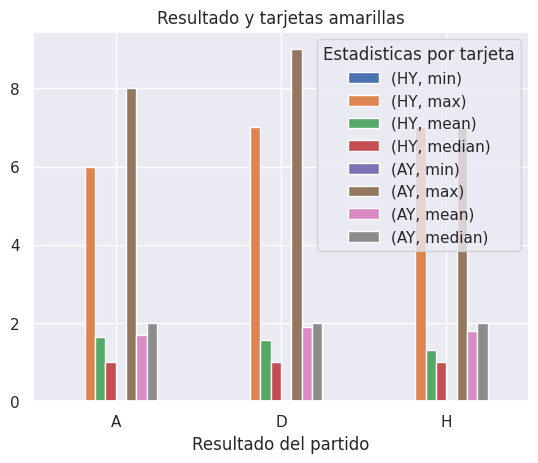

In [12]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Crear un bar plot para mostrar las estadísticas
estadisticas_agrupadas_tarjetas_amarillas.plot(kind='bar')
plt.title('Resultado y tarjetas amarillas')
plt.xlabel('Resultado del partido')
plt.legend(title='Estadisticas por tarjeta')
plt.xticks(rotation=0)
plt.show()

#### Tarjetas rojas

In [13]:
# Agrupar por variables por tarjetas rojas del partido
estadisticas_agrupadas_tarjetas_rojas = dataset_EPL.groupby(['FTR'])[['HR','AR']].agg(['min', 'max', 'mean', 'median'])

print('\nEstadisticas de tarjetas rojas')
print(estadisticas_agrupadas_tarjetas_rojas)


Estadisticas de tarjetas rojas
     HR                       AR                     
    min max      mean median min max      mean median
FTR                                                  
A     0   3  0.109694    0.0   0   2  0.047741    0.0
D     0   2  0.064391    0.0   0   2  0.083405    0.0
H     0   1  0.031068    0.0   0   2  0.111656    0.0


<Figure size 1200x1200 with 0 Axes>

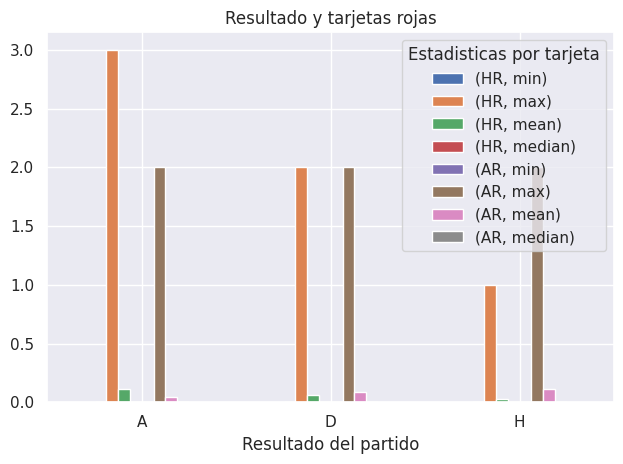

In [14]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Crear un bar plot para mostrar las estadísticas
estadisticas_agrupadas_tarjetas_rojas.plot(kind='bar')
plt.title('Resultado y tarjetas rojas')
plt.xlabel('Resultado del partido')
plt.legend(title='Estadisticas por tarjeta')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Equipos con más victorias como local y visitante

In [524]:
# Agrupar por equipo local y resultado, contar las victorias
victorias_local = dataset_EPL[dataset_EPL['FTR'] == 'H'].groupby('HomeTeam')['FTR'].count().reset_index()
victorias_local.rename(columns={'FTR': 'Victorias'}, inplace=True)

# Agrupar por equipo visitante y resultado, contar las victorias
victorias_visitante = dataset_EPL[dataset_EPL['FTR'] == 'A'].groupby('AwayTeam')['FTR'].count().reset_index()
victorias_visitante.rename(columns={'FTR': 'Victorias'}, inplace=True)

In [525]:
# Ordenar por victorias (descendente)
victorias_local = victorias_local.sort_values('Victorias', ascending=False)
victorias_visitante = victorias_visitante.sort_values('Victorias', ascending=False)

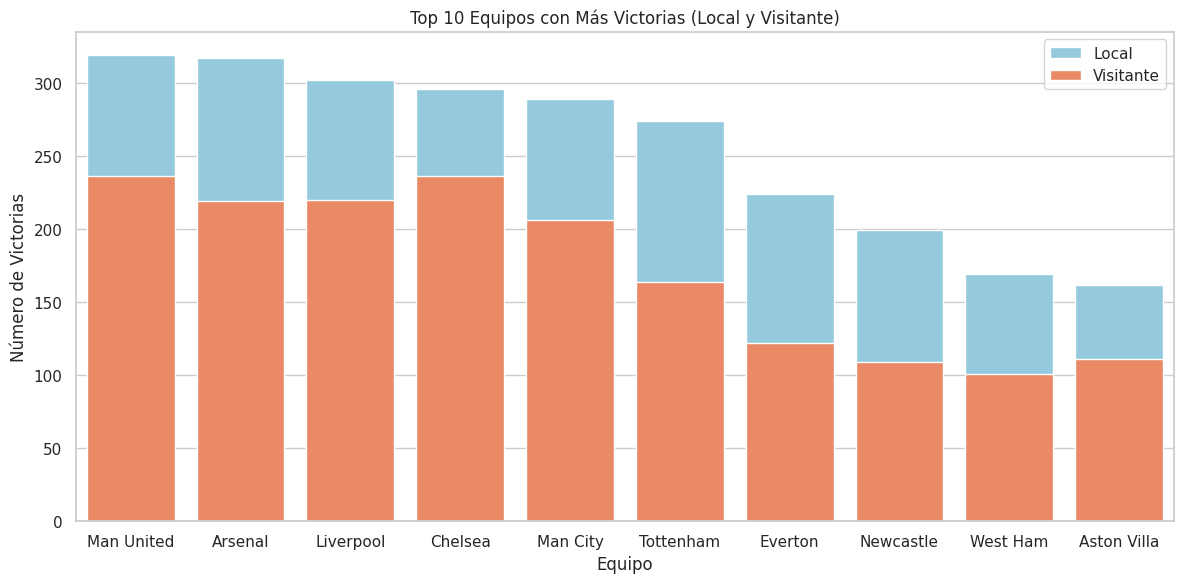

In [526]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para victorias locales y visitantes
sns.barplot(x='HomeTeam', y='Victorias', data=victorias_local.head(10), ax=ax, color='skyblue', label='Local')
sns.barplot(x='AwayTeam', y='Victorias', data=victorias_visitante.head(10), ax=ax, color='coral', label='Visitante')

# Configurar las etiquetas y el título
ax.set_xlabel('Equipo')
ax.set_ylabel('Número de Victorias')
ax.set_title('Top 10 Equipos con Más Victorias (Local y Visitante)')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

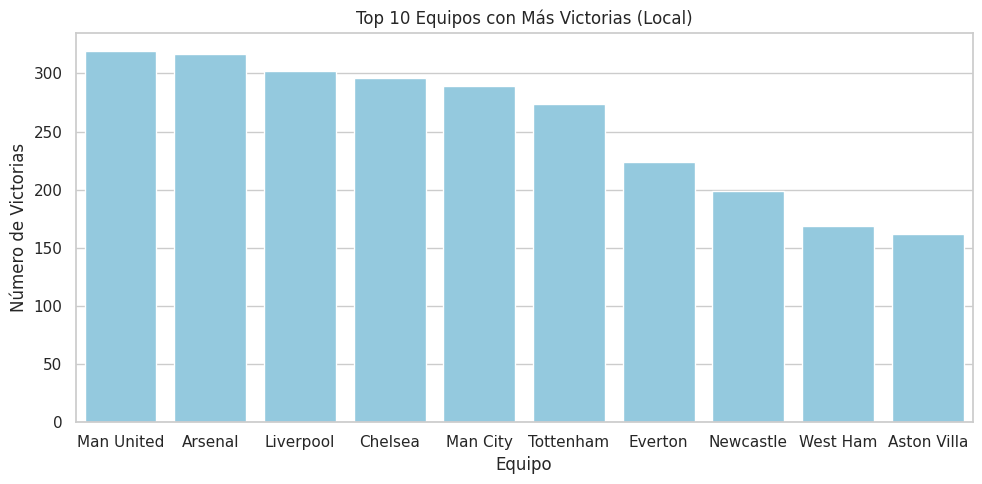

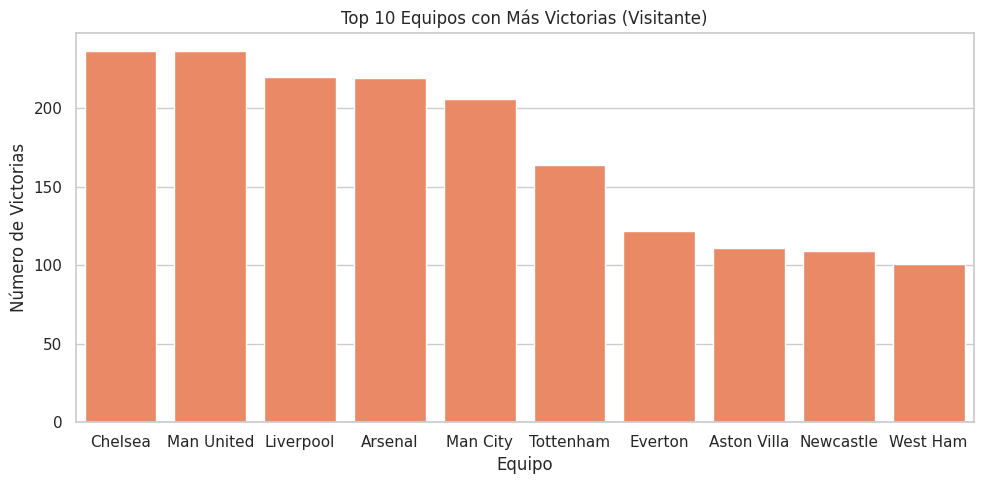

In [527]:
# Crear la primera gráfica (victorias locales)
plt.figure(figsize=(10, 5))
sns.barplot(x='HomeTeam', y='Victorias', data=victorias_local.head(10), color='skyblue')
plt.xlabel('Equipo')
plt.ylabel('Número de Victorias')
plt.title('Top 10 Equipos con Más Victorias (Local)')
plt.tight_layout()
plt.show()

# Crear la segunda gráfica (victorias visitantes)
plt.figure(figsize=(10, 5))
sns.barplot(x='AwayTeam', y='Victorias', data=victorias_visitante.head(10), color='coral')
plt.xlabel('Equipo')
plt.ylabel('Número de Victorias')
plt.title('Top 10 Equipos con Más Victorias (Visitante)')
plt.tight_layout()
plt.show()

#### Porcentajes de equipos con más victorias como local y visitante

In [529]:
# Partidos jugados como local
total_partidos_local = dataset_EPL.groupby('HomeTeam')['FTR'].count().reset_index()
total_partidos_local.rename(columns={'FTR': 'TotalPartidos'}, inplace=True)

# Partidos jugados como visitante
total_partidos_visitante = dataset_EPL.groupby('AwayTeam')['FTR'].count().reset_index()
total_partidos_visitante.rename(columns={'FTR': 'TotalPartidos'}, inplace=True)

# Victorias como local
victorias_local = dataset_EPL[dataset_EPL['FTR'] == 'H'].groupby('HomeTeam')['FTR'].count().reset_index()
victorias_local.rename(columns={'FTR': 'Victorias'}, inplace=True)

# Victorias como visitante
victorias_visitante = dataset_EPL[dataset_EPL['FTR'] == 'A'].groupby('AwayTeam')['FTR'].count().reset_index()
victorias_visitante.rename(columns={'FTR': 'Victorias'}, inplace=True)

In [530]:
# Combinar DataFrames para locales
porcentaje_victorias_local = pd.merge(victorias_local, total_partidos_local, on='HomeTeam')
porcentaje_victorias_local['PorcentajeVictorias'] = (porcentaje_victorias_local['Victorias'] / porcentaje_victorias_local['TotalPartidos']) * 100

# Combinar DataFrames para visitantes
porcentaje_victorias_visitante = pd.merge(victorias_visitante, total_partidos_visitante, on='AwayTeam')
porcentaje_victorias_visitante['PorcentajeVictorias'] = (porcentaje_victorias_visitante['Victorias'] / porcentaje_victorias_visitante['TotalPartidos']) * 100

In [531]:
# Ordenar por porcentaje de victorias (descendente)
porcentaje_victorias_local = porcentaje_victorias_local.sort_values('PorcentajeVictorias', ascending=False)
porcentaje_victorias_visitante = porcentaje_victorias_visitante.sort_values('PorcentajeVictorias', ascending=False)

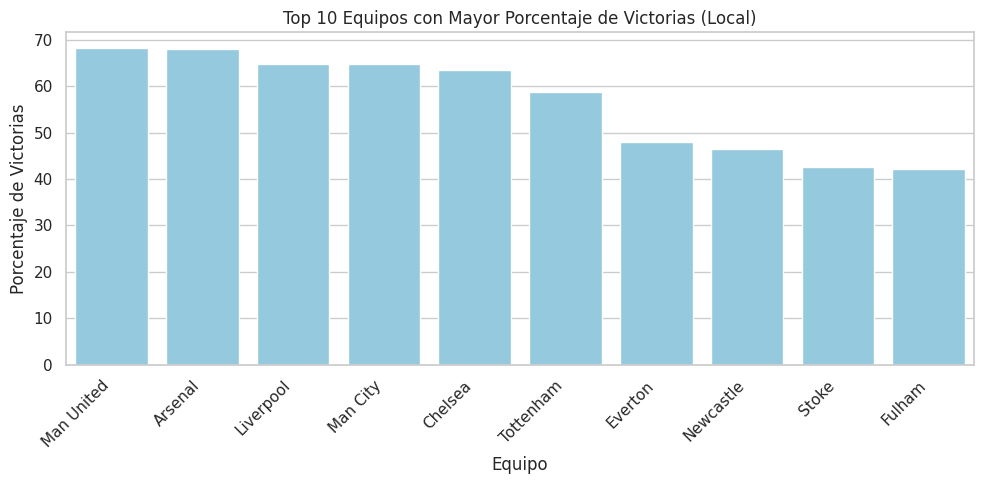

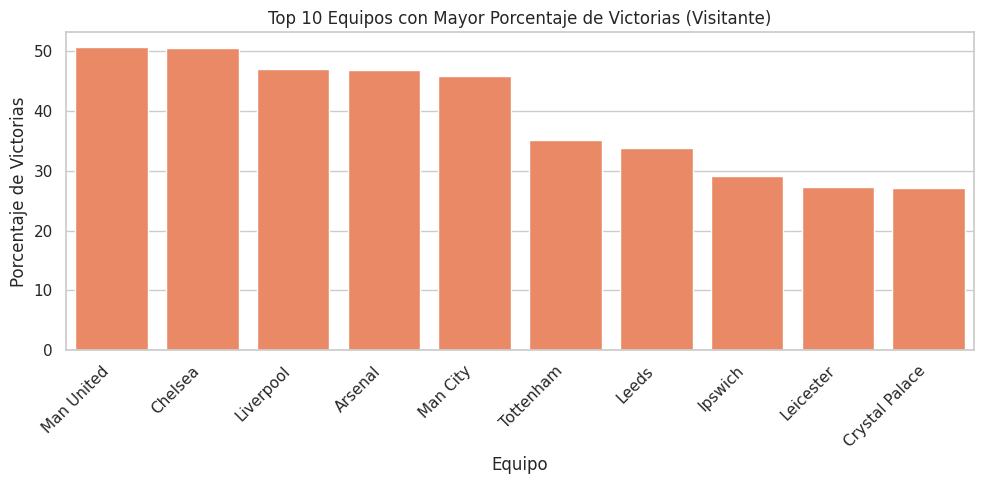

In [533]:
# Crear la primera gráfica (victorias locales)
plt.figure(figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
sns.barplot(x='HomeTeam', y='PorcentajeVictorias', data=porcentaje_victorias_local.head(10), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Victorias')
plt.title('Top 10 Equipos con Mayor Porcentaje de Victorias (Local)')
plt.tight_layout()
plt.show()

# Crear la segunda gráfica (victorias visitantes)
plt.figure(figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
sns.barplot(x='AwayTeam', y='PorcentajeVictorias', data=porcentaje_victorias_visitante.head(10), color='coral')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Victorias')
plt.title('Top 10 Equipos con Mayor Porcentaje de Victorias (Visitante)')
plt.tight_layout()
plt.show()

### Boxplots

#### Tarjetas amarillas

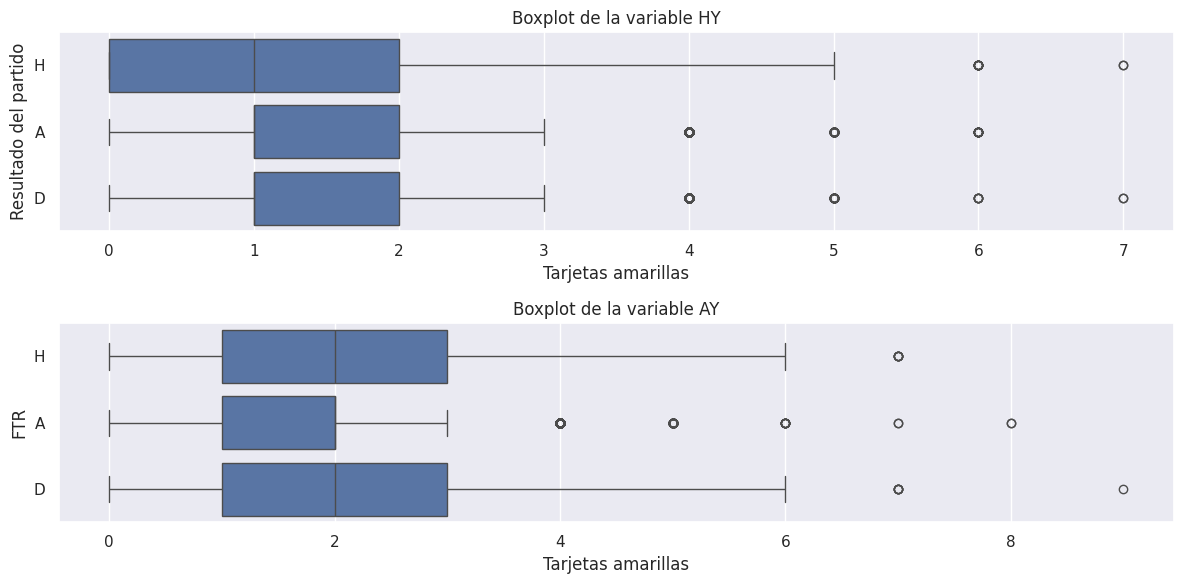

In [15]:
# Crear una figura con 2 subplots (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Crear el boxplot horizontal para cada variable 'HY', 'AY' contra el resultado 'FTR'
sns.boxplot(data=dataset_EPL, x='HY', y='FTR', ax=axes[0])
axes[0].set_title('Boxplot de la variable HY')
axes[0].set_xlabel('Tarjetas amarillas')
axes[0].set_ylabel('Resultado del partido')

sns.boxplot(data=dataset_EPL, x='AY', y='FTR', ax=axes[1])
axes[1].set_title('Boxplot de la variable AY')
axes[1].set_xlabel('Tarjetas amarillas')
axes[0].set_ylabel('Resultado del partido')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Tarjetas rojas

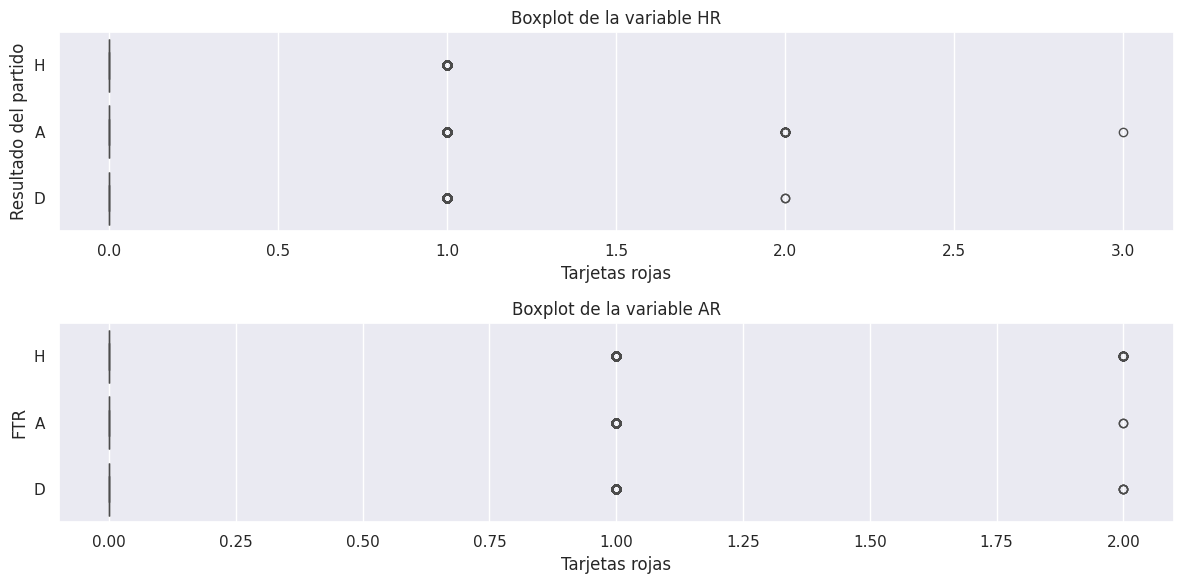

In [16]:
# Crear una figura con 2 subplots (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Crear el boxplot horizontal para cada variable 'HR', 'AR' contra el resultado 'FTR'
sns.boxplot(data=dataset_EPL, x='HR', y='FTR', ax=axes[0])
axes[0].set_title('Boxplot de la variable HR')
axes[0].set_xlabel('Tarjetas rojas')
axes[0].set_ylabel('Resultado del partido')

sns.boxplot(data=dataset_EPL, x='AR', y='FTR', ax=axes[1])
axes[1].set_title('Boxplot de la variable AR')
axes[1].set_xlabel('Tarjetas rojas')
axes[0].set_ylabel('Resultado del partido')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Análisis gráficas

Al revisar las relaciones que tienen las tarjetas amarillas y rojas sobre el resultado se evidencian valores similares tanto para equipo local como visitante, aquí lo obtenido de las gráficas:

*  **Valores mínimos y máximos:** Los mínimos de tarjetas en todos los casos son 0 debido a que hay partidos en donde no se sacan, respecto a los máximos varian un poco entre equipos local y visitante, por lo general un equipo visitante suele tener mayor más tarjetas que el local.
*   **Tarjetas amarillas y mediana:** Respecto a las tarjetas amarillas se ve una mediana redondeado a 2 tarjetas por partido para un equipo visitante y 1 tarjeta para un equipo local. Esto se puede evidenciar en el boxplot de tarjetas amarillas.
*   **Tarjetas rojas y mediana:** Para las tarjetas rojas se puede ver que la mediana esta en 0 y el promedio cercano a 0 también, esto debido a que en los partidos es muy raro que se saque una tarjeta roja, por lo cual en la mayoría de los casos es 0 de ahí que estos valores sean 0. Adicional esto se puede ver reflejado en el boxplot de tarjetas rojas donde no se puede ver el boxplot al ser tan cercano a 0.
*   **Equipos con más victorias y porcentaje de victorias:** Se agrupan los equipos tanto local como visitante y se encuentran que los 6 que se mantienen tanto local como visitante son **Arsenal, Liverpool, Manchester City, Man United, Chelsea y Tottenham**.

Al visualizar las gráficas se puede ver que para los 3 posibles resultados **(H=Victoria local, D=Empate, A=Victoria visitante)**, los valores para equipos locales y visitantes se mantienen en valores similares y no se ven cambios significativos, el único diferente son las medianas de tarjetas amarillas de 1 para local y 2 para visitante.
Los demás valores se diferencian por muy poco, pero se pueden sacar algunas conclusiones del análisis. En cualquier resultado de partido en promedio un equipo visitante tiene más tarjetas rojas y amarillas, la única excepción son las tarjetas rojas cuando gana un equipo visitante donde el equipo local tiene un promedio de 0.109694 y el visitante de 0.047741.

**Bajo este análisis las tarjetas amarillas no influyen significativamente en el resultado debido a que el equipo visitante suele obtener más en todos los casos, mientras que en las tarjetas rojas si se ve un impacto, cuando un equipo local obtiene una tarjeta roja es más probable que gane el equipo visitante y viceversa, esto se puede obtener de los promedios de la siguiente tabla.**

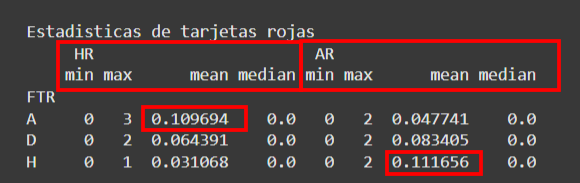

## Análisis de goles por equipos

Como parte del proceso de análisis se revisará como es la distribución de goles por cada equipo local y visitante, y como esto afecta a la variable objetivo 'FTR' que es el resultado del partido.

### Equipos locales

In [17]:
variableActual = 'HomeTeam'
variableComparar = 'FTHG'
# Se compara el equipo local en función de los goles del equipo local a tiempo completo
# y se organiza de mayor a menor mediana
median_order_local = (dataset_EPL.groupby(variableActual)[variableComparar].median().sort_values(ascending=False).index)
print('Listado de equipos ordenados por mediana de mayor a menor \n')
print(median_order_local)

Listado de equipos ordenados por mediana de mayor a menor 

Index(['Arsenal', 'Chelsea', 'Man City', 'Man United', 'Tottenham',
       'Liverpool', 'Middlesbrough', 'Newcastle', 'Norwich', 'Nott'm Forest',
       'Portsmouth', 'QPR', 'Sheffield United', 'Reading', 'Southampton',
       'Stoke', 'Sunderland', 'Swansea', 'Watford', 'West Brom', 'West Ham',
       'Wigan', 'Luton', 'Leicester', 'Aston Villa', 'Leeds', 'Birmingham',
       'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Bradford',
       'Brentford', 'Brighton', 'Burnley', 'Cardiff', 'Charlton', 'Coventry',
       'Crystal Palace', 'Derby', 'Everton', 'Fulham', 'Huddersfield', 'Hull',
       'Ipswich', 'Wolves'],
      dtype='object', name='HomeTeam')


Text(0.5, 1.0, 'Equipo local en función de goles anotados como local')

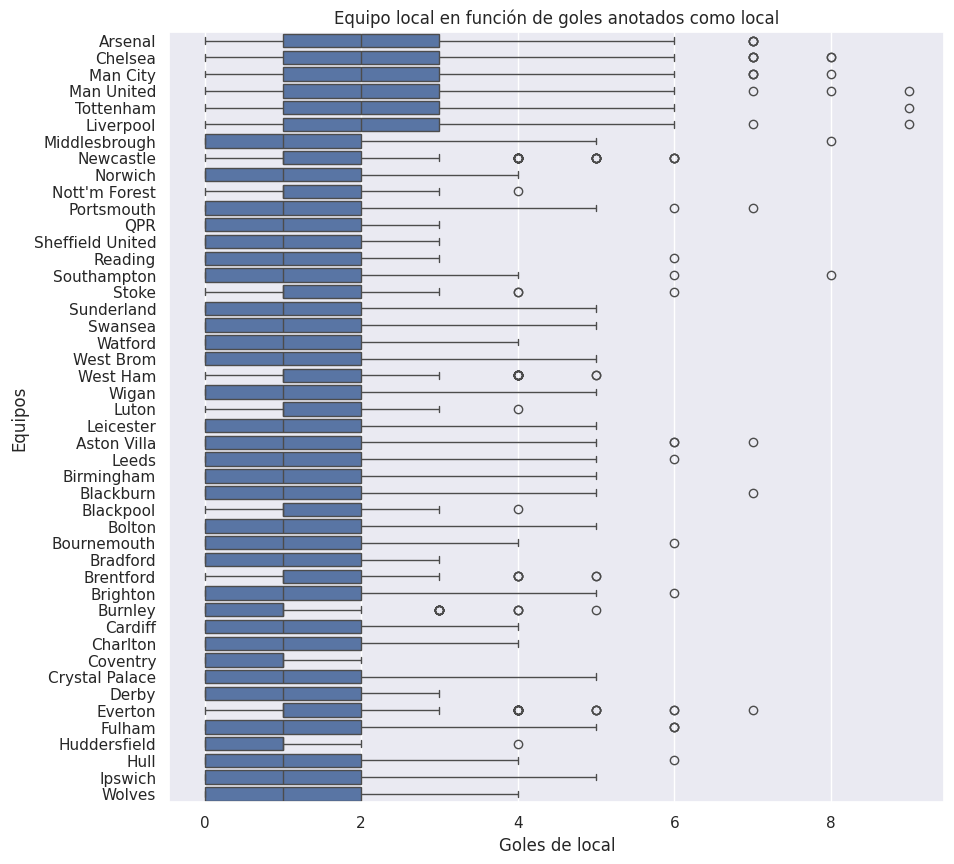

In [18]:
# Se crea la figura y se determina el tamaño
fig = plt.figure(figsize = (10,10))

# Bloxplot con comparación entre las 2 variables
sns.boxplot(data = dataset_EPL, y=variableActual, x=variableComparar, order=median_order_local)

plt.xlabel('Goles de local')
plt.ylabel('Equipos')
plt.title('Equipo local en función de goles anotados como local')

### Equipos visitantes

In [19]:
variableActual = 'AwayTeam'
variableComparar = 'FTAG'
# Se compara el equipo visitante en función de los goles del equipo visitante a tiempo completo
# y se organiza de mayor a menor promedio
mean_order_visitante = (dataset_EPL.groupby(variableActual)[variableComparar].mean().sort_values(ascending=False).index)
print('Listado de equipos ordenados por promedio de mayor a menor \n')
print(mean_order_visitante)

Listado de equipos ordenados por promedio de mayor a menor 

Index(['Arsenal', 'Liverpool', 'Man City', 'Man United', 'Chelsea',
       'Tottenham', 'Leeds', 'Leicester', 'Blackpool', 'Brentford', 'Luton',
       'Ipswich', 'Bournemouth', 'Coventry', 'Brighton', 'Aston Villa',
       'Reading', 'Crystal Palace', 'Newcastle', 'Blackburn', 'West Ham',
       'Everton', 'Nott'm Forest', 'Bolton', 'Southampton', 'Wolves', 'Wigan',
       'QPR', 'Swansea', 'Fulham', 'Burnley', 'Charlton', 'Watford',
       'Sunderland', 'West Brom', 'Middlesbrough', 'Birmingham', 'Portsmouth',
       'Stoke', 'Hull', 'Norwich', 'Cardiff', 'Huddersfield',
       'Sheffield United', 'Derby', 'Bradford'],
      dtype='object', name='AwayTeam')


Text(0.5, 1.0, 'Equipo local en función de goles anotados como local')

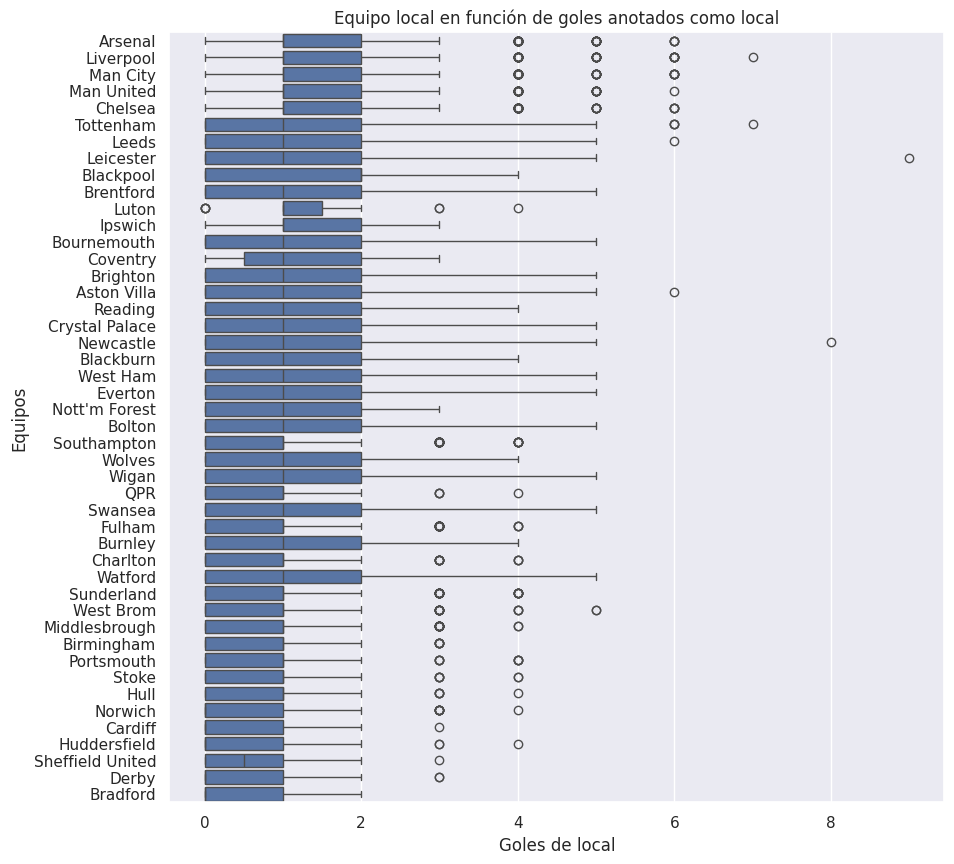

In [20]:
# Se crea la figura y se determina el tamaño
fig = plt.figure(figsize = (10,10))

# Bloxplot con comparación entre las 2 variables
sns.boxplot(data = dataset_EPL, y=variableActual, x=variableComparar, order=mean_order_visitante)

plt.xlabel('Goles de local')
plt.ylabel('Equipos')
plt.title('Equipo local en función de goles anotados como local')

### Análisis gráficas

Para profundizar un poco en la relación entre goles anotados y equipos locales y visitantes se hicieron gráficas con estas variables y los resultados obtenidos son:

*   **Mediana y media:** Para el ejercicio de equipos locales se usa la mediana como medio para organizar los equipos por goles mas anotados, para el caso de equipos visitantes se usa la media debido a que la mediana para casi todos los equipos son similares, mientras con la media se ve mejor forma de ordenar.
*   **Equipos con más goles:** Del ordenamiento realizado tanto para equipos locales y visitantes se ve que varios equipos dominan el rango los cuales son: **Arsenal, Liverpool, Manchester City, Man United, Chelsea y Tottenham**. Estos 6 equipos coinciden con los encontrados a excepción del ***Everton*** en el análisis univariado de equipos que más partidos juegan, por lo cual vemos una relación entre equipos con más juegos y equipos que más anotan goles. Esta información se puede ver en la siguiente imagen.

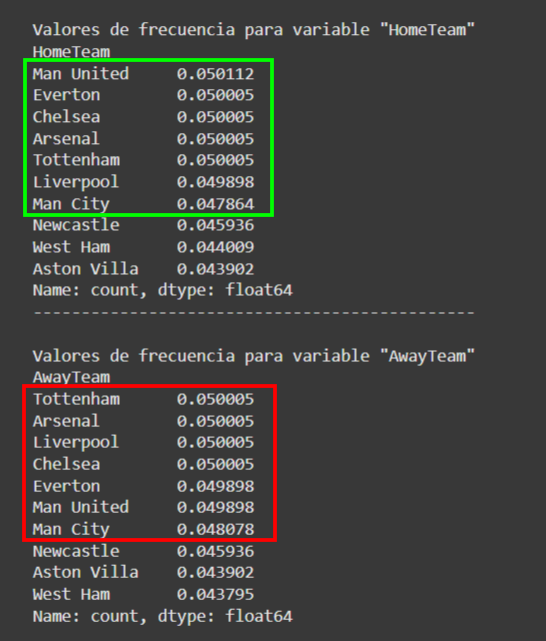

## Análisis de disparos por equipos

Ahora se van a revisar otras variables numéricas las cuales son **'HS'** (Disparos del equipo local) y **'AS'** (Disparos del equipo visitante). Este análisis se va a realizar a través de un jointploy.

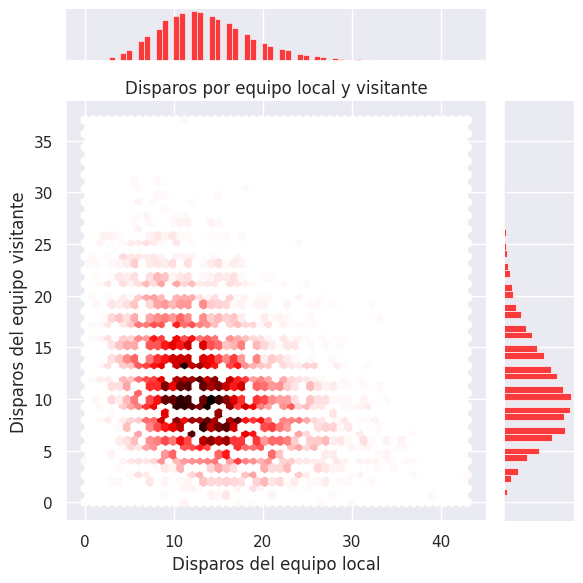

In [21]:
# Creación de un joinplot para graficar disparos del equipo local y visitante
sns.jointplot(data = dataset_EPL, x='HS', y='AS', kind="hex", color = 'red')

plt.title('Disparos por equipo local y visitante')
plt.xlabel('Disparos del equipo local')
plt.ylabel('Disparos del equipo visitante')
plt.tight_layout()
plt.show()

### Análisis gráficas

De la gráfica jointplot en donde se comparan las variables **'HS'** (Disparos del equipo local) y **'AS'** (Disparos del equipo visitante) se obtiene la siguiente información:

*   **Concentración de disparos:** La concentración se ve alrededor de la posición [15,10] en la gráfica, de las gráficas de barra en la derecha y arriba se puede ver como está la distribución.
*   **Disparos por equipo:** De la gráfica se observa que hay más disparos realizados por el equipo local contra el equipo visitante.

## Análisis general del dataset

Durante la primera fase se realizó el análisis univariado y multivariado de las variables relevantes y objetivo del dataset, de allí se encontraron relaciones entre **'FTR'** (Resultado a tiempo completo) que es la variable objetivo con las variables de disparos, tiros a puerta, equipos y goles de local y visitante, al igual que las tarjetas amarillas y rojas.

En esta fase se utilizaron diferentes gráficas para analizar variables cualitativas y cuantitativas abordando los valores de los equipos locales y visitantes.

# FASE 2: Limpieza y transformación de los datos

## Errores y datos atípicos

Como otra parte del análisis se van a revisar las variables cuantitativas referente a los goles, disparos, tiros a puertas, tiros de esquina, faltas y tarjetas amarillas y rojas.

In [22]:
def calcular_atipicos(columnas):
  lista_atipicos = []
  for columna in columnas:
    Q1 = dataset_EPL[columna].quantile(0.25)
    Q3 = dataset_EPL[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites superior e inferior de los bigotes para identificar atípicos severos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los datos para obtener los atípicos severos
    # (Se toman los que esten por debajo y por encima de los bigotes)
    atipicos_precio = dataset_EPL[(dataset_EPL['HTHG'] <= limite_inferior) | (dataset_EPL['HTHG'] >= limite_superior)]

    lista_atipicos.append(atipicos_precio)

    # Imprime las dimensiones del subconjunto
    print(f"Atipicos de {columna} con shape {atipicos_precio.shape}")

  return lista_atipicos

In [23]:
columnas = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
atipicos = calcular_atipicos(columnas)

Atipicos de HTHG con shape (317, 22)
Atipicos de HTAG con shape (317, 22)
Atipicos de HS con shape (0, 22)
Atipicos de AS con shape (0, 22)
Atipicos de HST con shape (0, 22)
Atipicos de AST con shape (0, 22)
Atipicos de HC con shape (0, 22)
Atipicos de AC con shape (0, 22)
Atipicos de HF con shape (7909, 22)
Atipicos de AF con shape (7909, 22)
Atipicos de HY con shape (54, 22)
Atipicos de AY con shape (0, 22)
Atipicos de HR con shape (9339, 22)
Atipicos de AR con shape (9339, 22)


De los atípicos obtenidos hay algunas variables que no tiene valores atípicos, y hay otras variables que tienen muchos atípicos como **HF,AF,HR y AR.** Para analizarlas se van a usar histplot para visualizar y ver si son errores o atípicos que afecten el procesamiento del dataset.

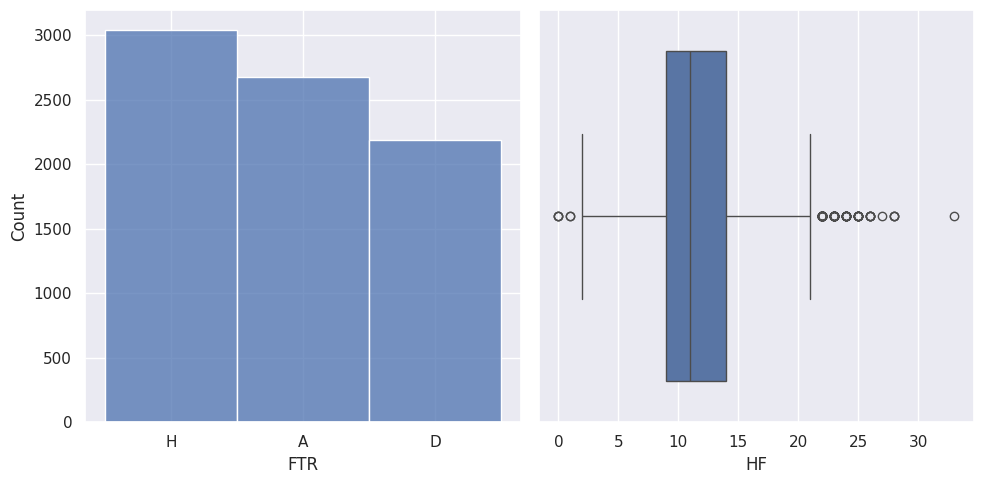

In [24]:
# Histoplot y boxplot de datos atipicos para variable 'HF' (Faltas del equipo local)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = atipicos[8], x='FTR', ax = ax[0])
sns.boxplot(data = dataset_EPL, x='HF', ax = ax[1])
plt.tight_layout()
plt.show()

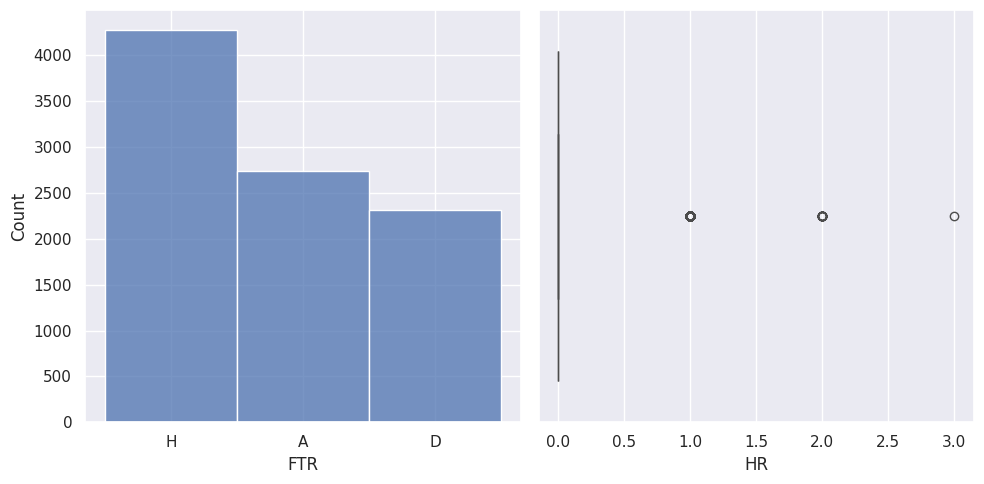

In [25]:
# Histoplot de datos atipicos para variable 'HR' (Tarjetas rojas del equipo local)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = atipicos[12], x='FTR', ax = ax[0])
sns.boxplot(data = dataset_EPL, x='HR', ax = ax[1])
plt.tight_layout()
plt.show()

En estas gráficas se visualiza la distribución de atípicos respecto a los resultados del partido:

*   **Faltas de equipos locales y visitantes:** en el boxplot se ve que todos los valores que esten por debajo de 2 faltas y encima a 21 son los atípicos.
*   **Tarjetas rojas de equipos locales y visitantes:** en el boxplot se ve que todos los valores que esten por encima de 0 faltas son atípicos, por eso hay 9339 atípicos que corresponden al 100% de los datos.

Al revisar estos valores atípicos son coherentes con el contexto de un partido de fútbol donde puede darse el valor de 0 o cualquier entero positivo, por lo cual a pesar de ser atípicos son valores reales y lógicos que se seguirón usando para el análisis del dataset.

## Valores nulos

A continuación de la revisión de atípicos y errores se van a validar los valores nulos de cada variable.

In [26]:
# Se suma el número de valores que no son nulos y se divide en el número de elementos
# para obtener el porcentaje, por último se multiplica por 100
(dataset_EPL.isnull().sum().sort_values(ascending = False).head(20) / dataset_EPL.shape[0]) * 100

,0
Date,0.0
HomeTeam,0.0
HR,0.0
AY,0.0
HY,0.0
AC,0.0
HC,0.0
AF,0.0
HF,0.0
AST,0.0


In [27]:
print(f'El numero de filas del dataset completo son: {dataset_EPL.shape[0]}')
print(f'El numero de filas del dataset sin valores nulos es: {dataset_EPL.dropna().shape[0]}')

El numero de filas del dataset completo son: 9339
El numero de filas del dataset sin valores nulos es: 9339


Al revisar la tabla anterior se ve que para todas las variables están en 0, lo que quiere decir que para este dataset para ninguna variable hay valores nulos. Por lo cual no es necesario hacer ninguna transformación o manejo de valores nulos.

También al comparar el número de filas del dataset completo y dataset sin valores nulos son el mismo valor de 9339, que apoya la tabla de % de valores nulos.

## Variables Cualitativas

 Los algoritmos de Machine Learning no entienden los strings, por eso es necesario numerizar estos valores. Para lo cual primero se van a identificar las variables de tipo objeto.

In [28]:
# Filtrar las variables tipo object
dataset_EPL_object = dataset_EPL.select_dtypes(include = 'object')
dataset_EPL_object.head()

,Date,HomeTeam,AwayTeam,FTR,HTR,Referee
0,19/08/00,Charlton,Man City,H,H,Rob Harris
1,19/08/00,Chelsea,West Ham,H,H,Graham Barber
2,19/08/00,Coventry,Middlesbrough,A,D,Barry Knight
3,19/08/00,Derby,Southampton,D,A,Andy D'Urso
4,19/08/00,Leeds,Everton,H,H,Dermot Gallagher


Ahora los niveles que pueden tomar cada una de las variables.

In [29]:
for variable in dataset_EPL_object.columns:
  niveles = dataset_EPL_object[variable].nunique()
  print(f'La variable {variable}, tiene {niveles} niveles.')

La variable Date, tiene 2581 niveles.
La variable HomeTeam, tiene 46 niveles.
La variable AwayTeam, tiene 46 niveles.
La variable FTR, tiene 3 niveles.
La variable HTR, tiene 3 niveles.
La variable Referee, tiene 184 niveles.


Las variables son cualitativas ordinales, por lo que una transformación tipo dummy sería lo más apropiado, sin embargo, sí hacemos esto se crearía un dataframe con 2.863 variables adicionales, esto puede entorpecer el trabajo con el dataframe. Por lo cual se realizarán las siguientes transformaciones de las variables:
1. Aplicar la transformación dummy a las variables **FTR y HTR**.
2. Aplicar ordinal encoding a las variables **HomeTeam, AwayTeam, Date y Referee**.

## Transformación de variables

### Transformación dummy

Para la transformación dummy se tomarán las variables **FTR y HTR**.

In [30]:
dataset_EPL_transformed = pd.get_dummies(dataset_EPL, columns=['FTR'])
print(dataset_EPL_transformed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      9339 non-null   object
 1   HomeTeam  9339 non-null   object
 2   AwayTeam  9339 non-null   object
 3   FTHG      9339 non-null   int64 
 4   FTAG      9339 non-null   int64 
 5   HTHG      9339 non-null   int64 
 6   HTAG      9339 non-null   int64 
 7   HTR       9339 non-null   object
 8   Referee   9339 non-null   object
 9   HS        9339 non-null   int64 
 10  AS        9339 non-null   int64 
 11  HST       9339 non-null   int64 
 12  AST       9339 non-null   int64 
 13  HF        9339 non-null   int64 
 14  AF        9339 non-null   int64 
 15  HC        9339 non-null   int64 
 16  AC        9339 non-null   int64 
 17  HY        9339 non-null   int64 
 18  AY        9339 non-null   int64 
 19  HR        9339 non-null   int64 
 20  AR        9339 non-null   int64 
 21  FTR_A     9339

In [31]:
dataset_EPL_transformed = pd.get_dummies(dataset_EPL_transformed, columns=['HTR'])
print(dataset_EPL_transformed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      9339 non-null   object
 1   HomeTeam  9339 non-null   object
 2   AwayTeam  9339 non-null   object
 3   FTHG      9339 non-null   int64 
 4   FTAG      9339 non-null   int64 
 5   HTHG      9339 non-null   int64 
 6   HTAG      9339 non-null   int64 
 7   Referee   9339 non-null   object
 8   HS        9339 non-null   int64 
 9   AS        9339 non-null   int64 
 10  HST       9339 non-null   int64 
 11  AST       9339 non-null   int64 
 12  HF        9339 non-null   int64 
 13  AF        9339 non-null   int64 
 14  HC        9339 non-null   int64 
 15  AC        9339 non-null   int64 
 16  HY        9339 non-null   int64 
 17  AY        9339 non-null   int64 
 18  HR        9339 non-null   int64 
 19  AR        9339 non-null   int64 
 20  FTR_A     9339 non-null   bool  
 21  FTR_D     9339

Al hacer estas 2 transformacions dummy de las variables **FTR y HTR** se agregan 6 variables: **FTR_A, FTR_D, FTR_H, HTR_A, HTR_D, HTR_H**

### Transformación ordinal encoding

Para la transformación ordinal encoding se tomarán las variables **HomeTeam, AwayTeam, Date y Referee**.

In [32]:
# Crear el encoder ordinal
encoder = OrdinalEncoder()

# Ajustar el encoder para las columnas 'HomeTeam', 'AwayTeam', 'Date' y 'Referee'
encoder.fit(dataset_EPL_transformed[['HomeTeam', 'AwayTeam', 'Date', 'Referee']])

# Transformar las columnas
ord_vars = encoder.transform(dataset_EPL_transformed[['HomeTeam', 'AwayTeam', 'Date', 'Referee']])
print(ord_vars)

[[  12.   26. 1540.  142.]
 [  13.   43. 1540.   64.]
 [  14.   28. 1540.   19.]
 ...
 [  31.   36. 1502.    4.]
 [  21.   26. 1502.  147.]
 [  13.   45. 1599.  150.]]


El método Ordinal Encoder de scikitlearn organiza las categorías en orden alfabético. A continuación se muestra el objeto que contiene la información sobre la codificación.

In [33]:
# Retorna dos listas con dos arreglos de numpy
# Cada arreglo contiene las categorías de cada variable transformada
encoder.categories_

[array(['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool',
        'Bolton', 'Bournemouth', 'Bradford', 'Brentford', 'Brighton',
        'Burnley', 'Cardiff', 'Charlton', 'Chelsea', 'Coventry',
        'Crystal Palace', 'Derby', 'Everton', 'Fulham', 'Huddersfield',
        'Hull', 'Ipswich', 'Leeds', 'Leicester', 'Liverpool', 'Luton',
        'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich',
        "Nott'm Forest", 'Portsmouth', 'QPR', 'Reading',
        'Sheffield United', 'Southampton', 'Stoke', 'Sunderland',
        'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham',
        'Wigan', 'Wolves'], dtype=object),
 array(['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool',
        'Bolton', 'Bournemouth', 'Bradford', 'Brentford', 'Brighton',
        'Burnley', 'Cardiff', 'Charlton', 'Chelsea', 'Coventry',
        'Crystal Palace', 'Derby', 'Everton', 'Fulham', 'Huddersfield',
        'Hull', 'Ipswich', 'Leeds', 'Leicester', 'Liverpoo

De la transformación ordinal encoding se van a organizar para reemplazar en el dataset que ya tiene la transformación dummy. Se crearán diccionarios en formato csv con la codificación de ambas variables. El proceso de documentación es clave en el proyecto.

In [34]:
# Extraemos el arreglo relacionado con el equipo local
categories_neigh = encoder.categories_[0]

# Creamos una lista con números igual a la longitud del arreglo del equipo local
neigh_codes = [i for i in range(len(categories_neigh))]

# Creamos un dataframe con el equipo local y códigos
home_team = pd.DataFrame({'codigo': neigh_codes,
                        'home_team': categories_neigh})

# Creamos un archivo csv para la documentación del proceso
home_team.to_csv('HomeTeam.csv')
home_team.head()

,codigo,home_team
0,0,Arsenal
1,1,Aston Villa
2,2,Birmingham
3,3,Blackburn
4,4,Blackpool


In [35]:
# Extraemos el arreglo relacionado con el equipo visitante
categories_neigh = encoder.categories_[1]

# Creamos una lista con números igual a la longitud del arreglo del equipo visitante
neigh_codes = [i for i in range(len(categories_neigh))]

# Creamos un dataframe con el equipo visitante y códigos
away_team = pd.DataFrame({'codigo': neigh_codes,
                        'away_team': categories_neigh})

# Creamos un archivo csv para la documentación del proceso
away_team.to_csv('AwayTeam.csv')
away_team.head()

,codigo,away_team
0,0,Arsenal
1,1,Aston Villa
2,2,Birmingham
3,3,Blackburn
4,4,Blackpool


In [37]:
# Extraemos el arreglo relacionado con la fecha
categories_neigh = encoder.categories_[2]

# Creamos una lista con números igual a la longitud del arreglo de la fecha
neigh_codes = [i for i in range(len(categories_neigh))]

# Creamos un dataframe con la fecha y códigos
date = pd.DataFrame({'codigo': neigh_codes,
                      'date': categories_neigh})

# Creamos un archivo csv para la documentación del proceso
date.to_csv('Date.csv')
date.head()

,codigo,date
0,0,01/01/01
1,1,01/01/02
2,2,01/01/03
3,3,01/01/05
4,4,01/01/07


In [39]:
# Extraemos el arreglo relacionado con el arbitro
categories_neigh = encoder.categories_[3]

# Creamos una lista con números igual a la longitud del arreglo del arbitro
neigh_codes = [i for i in range(len(categories_neigh))]

# Creamos un dataframe con el arbitro y códigos
referee = pd.DataFrame({'codigo': neigh_codes,
                      'referee': categories_neigh})

# Creamos un archivo csv para la documentación del proceso
referee.to_csv('Referee.csv')
referee.head()

,codigo,referee
0,0,A D'Urso
1,1,A Madley
2,2,A Marriner
3,3,A Moss
4,4,A Taylor


Para finalizar, se reemplazan las variables transformadas en el dataframe original. Y se revisa el dataframe con las variables codificadas como númericas.

In [40]:
# Convertimos el arreglo de numpy en un dataframe
ord_vars = pd.DataFrame(ord_vars, columns = ['HomeTeam', 'AwayTeam', 'Date', 'Referee'])
ord_vars.head()

,HomeTeam,AwayTeam,Date,Referee
0,12.0,26.0,1540.0,142.0
1,13.0,43.0,1540.0,64.0
2,14.0,28.0,1540.0,19.0
3,16.0,36.0,1540.0,12.0
4,22.0,17.0,1540.0,45.0


In [41]:
# Reemplazamos en nuestro dataset original
for variable in ord_vars.columns:
  dataset_EPL_transformed[variable] = ord_vars[variable]

dataset_EPL_transformed.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,1540.0,12.0,26.0,4,0,2,0,142.0,17,8,14,4,13,12,6,6,1,2,0,0,False,False,True,False,False,True
1,1540.0,13.0,43.0,4,2,1,0,64.0,17,12,10,5,19,14,7,7,1,2,0,0,False,False,True,False,False,True
2,1540.0,14.0,28.0,1,3,1,1,19.0,6,16,3,9,15,21,8,4,5,3,1,0,True,False,False,False,True,False
3,1540.0,16.0,36.0,2,2,1,2,12.0,6,13,4,6,11,13,5,8,1,1,0,0,False,True,False,True,False,False
4,1540.0,22.0,17.0,2,0,2,0,45.0,17,12,8,6,21,20,6,4,1,3,0,0,False,False,True,False,False,True


In [42]:
print('Dataset original')
print(dataset_EPL.shape)
print('---------------------------------')
print('Dataset con transformaciones')
print(dataset_EPL_transformed.shape)

Dataset original
(9339, 22)
---------------------------------
Dataset con transformaciones
(9339, 26)


## Análisis de la limpieza de los datos y las transformaciones

En esta sección se limpian y transforman los datos, para el dataset analizado no fue necesario eliminar los datos atípicos debido a que tienen lógica en los partidos jugados y no son errores, además no habían valores nulos a tratar.

Adicional se identifican las variables cualitativas y se transforman a cualitativas con las transformaciones dummy y ordinal encoding para el proceso de creación del modelo machine learning.

**Antes de la transformación se tenían 22 columnas y luego de la transformación quedan 26 columnas.**

# FASE 3: Modelamiento con machine learning

Antes de comenzar, debemos revisar el cumplimiento de algunas condiciones y los pasos a seguir durante esta fase.

**Condiciones iniciales:**
1. Se hizo una fase de exploración prevía en la cuál se encontraron relaciones importantes, se encontraron errores o problemas que debían ser corregidos.
2. Se hizo la limpieza de valores faltantes, atípicos y además la transformación de las variables cualitativas.
**Pasos en la fase de modelamiento**
3. Se tiene una clara variable objetivo, y se ha definido cual es el problema a resolver.
4. Definir los algoritmos de trabajo.
5. Entrenar modelos, optimizarlos y evaluar su desempeño
6. Extraer valor de los modelos construidos

## Revisión de valores nulos

Antes de crear el modelo se validarán nuevamente los valores nulos del dataset a usar como recurso para el proceso de modelamiento.

In [43]:
dataset_EPL_transformed.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,1540.0,12.0,26.0,4,0,2,0,142.0,17,8,14,4,13,12,6,6,1,2,0,0,False,False,True,False,False,True
1,1540.0,13.0,43.0,4,2,1,0,64.0,17,12,10,5,19,14,7,7,1,2,0,0,False,False,True,False,False,True
2,1540.0,14.0,28.0,1,3,1,1,19.0,6,16,3,9,15,21,8,4,5,3,1,0,True,False,False,False,True,False
3,1540.0,16.0,36.0,2,2,1,2,12.0,6,13,4,6,11,13,5,8,1,1,0,0,False,True,False,True,False,False
4,1540.0,22.0,17.0,2,0,2,0,45.0,17,12,8,6,21,20,6,4,1,3,0,0,False,False,True,False,False,True


In [44]:
# El dataset de trabajo no contiene ningún valor nulo
dataset_EPL_transformed.isnull().sum()

,0
Date,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
HTHG,0
HTAG,0
Referee,0
HS,0
AS,0


## Partición del dataset: Subconjuntos de prueba y entrenamiento

Como el dataset no tiene valores nulos, se va a particionar en 2 subconjuntos, uno de prueba y otro de entrenamiento. Para el de prueba se tomará el 30% de los datos y para entrenamiento el 70%.

In [335]:
columnas_entrenar = ['FTR_H', 'FTR_D', 'FTR_A']
# Se divide el dataset en datos de entrenamiento y de prueba con train_test_split()
train, test = sklearn.model_selection.train_test_split(dataset_EPL_transformed,test_size = 0.3,random_state = 0)

# Se divide en un grupo sin la variable objetivo y otro solo con la variable objetiva
# Se hace para los datos de entrenamiento y prueba
# Variables predictoras (todas las columnas excepto las dummy de FTR)
X_train = train.drop(columns=columnas_entrenar,axis = 1)
# Variable objetivo (las columnas dummy de FTR)
y_train = train[columnas_entrenar]

print(f'Dimensiones de X de entrenamiento: {X_train.shape}')
print(f'Dimensiones de y de entrenamiento: {y_train.shape}')

X_test = test.drop(columns=columnas_entrenar,axis = 1)
y_test = test[columnas_entrenar]

print(f'Dimensiones de X de prueba: {X_test.shape}')
print(f'Dimensiones de y de prueba: {y_test.shape}')

Dimensiones de X de entrenamiento: (6537, 23)
Dimensiones de y de entrenamiento: (6537, 3)
Dimensiones de X de prueba: (2802, 23)
Dimensiones de y de prueba: (2802, 3)


Observemos cómo están distribuidas las muestras en el conjunto de prueba y entrenamiento.

<Axes: xlabel='FTR_A', ylabel='Count'>

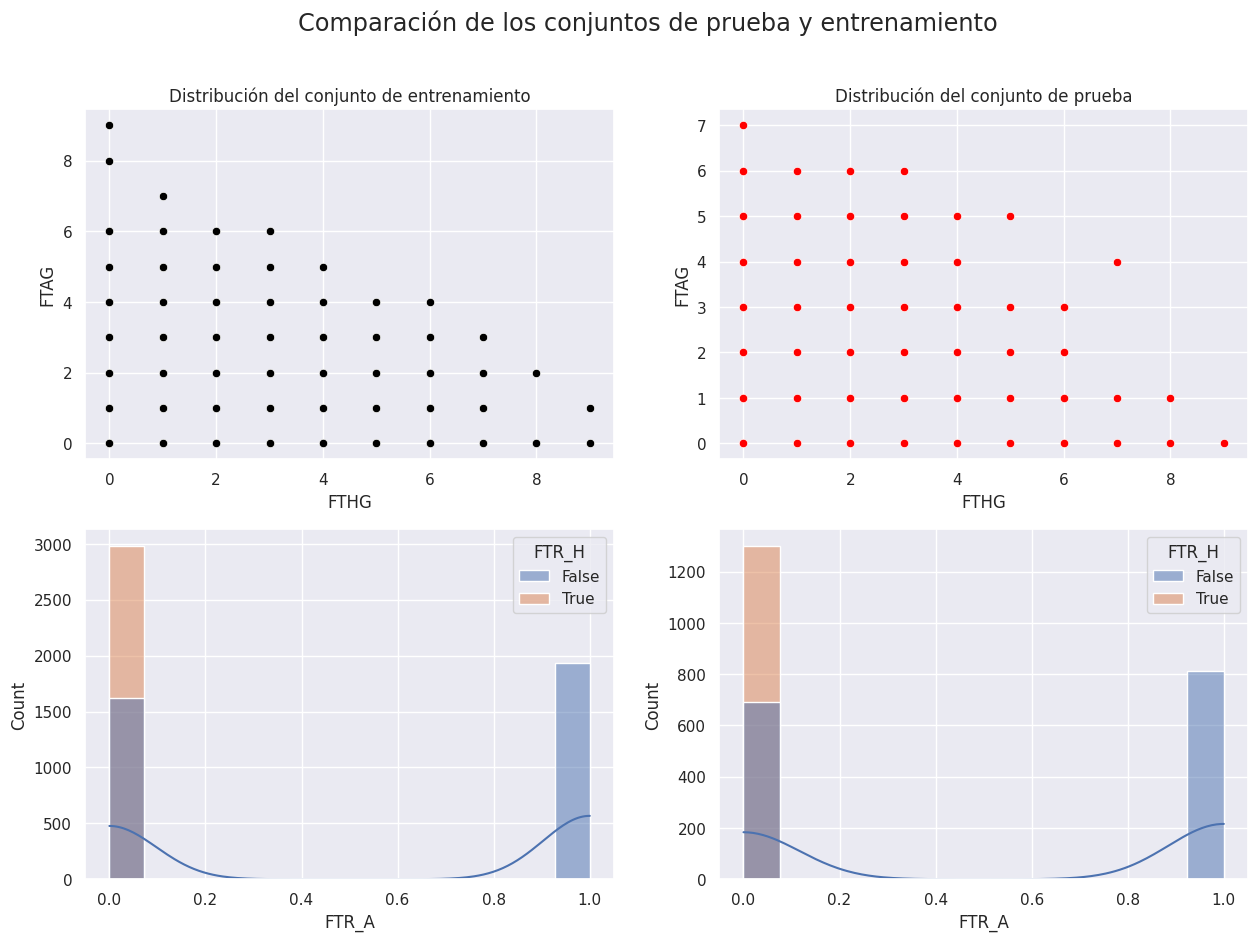

In [46]:
# Graficar los resultados del punto anterior
fig, ax = plt.subplots(2,2,figsize = (15,10))

plt.suptitle('Comparación de los conjuntos de prueba y entrenamiento', size='x-large')

ax[0,0].set_title('Distribución del conjunto de entrenamiento')
sns.scatterplot(data=X_train, x='FTHG', y='FTAG', color='black', ax=ax[0,0])

ax[0,1].set_title('Distribución del conjunto de prueba')
sns.scatterplot(data=X_test, x='FTHG', y='FTAG', color='red', ax=ax[0,1])

sns.histplot(x=y_train['FTR_A'], kde=True, ax=ax[1,0], hue=y_train['FTR_H'])
sns.histplot(x=y_test['FTR_A'], kde=True, ax=ax[1,1], hue=y_test['FTR_H'])


## **Vecinos más cercanos - KNN**

**KNN clasifica un nuevo punto basándose en la "mayoría de votos" de sus vecinos más cercanos.**

Se va a entrenar el primer modelo usando el regresor de vecinos más cercanos.

| Ventajas | Desventajas |
|----------|----------|
| **Simplicidad:** Es fácil de entender y de implementar, no requiere muchos parámetros de ajuste. | **Costoso computacionalmente:** Especialmente con grandes conjuntos de datos, calcular la distancia a todos los puntos de entrenamiento puede ser lento. |
| **Versatilidad:** Puede utilizarse tanto para problemas de clasificación como de regresión. | **Sensible a los datos:** El rendimiento puede verse afectado por la presencia de ruido o outliers en los datos. |
| **No paramétrico:** No asume una distribución particular de los datos, lo que lo hace flexible para diversos tipos de datos. | **Dependencia de la elección de K:** La elección del valor óptimo de K puede ser difícil y afectar significativamente los resultados. |
| **Intuitivo:** La idea de que los puntos cercanos son similares es fácil de conceptualizar. | **Sensible a la escala:** La escala de las características puede influir en gran medida en los resultados, por lo que a menudo es necesario normalizar o estandarizar los datos. |


**Fuentes:**

*   https://www.ibm.com/es-es/topics/knn
*   https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6

### Entrenamiento con los parámetros por defecto

In [47]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

Según la documentación estos son los parámetros por defecto:

|Parámetro|Valor por defecto|Explicación|
|----------|----------|----------|
|n_neighbors|5|Número de vecinos a considerar para la predicción.|
|weights|'uniform'|Peso asignado a cada vecino. 'uniform' significa que todos los vecinos tienen el mismo peso.|
|algorithm|'auto'|Algoritmo utilizado para encontrar los vecinos más cercanos. 'auto' selecciona automáticamente el algoritmo más adecuado.|
|leaf_size|30|Tamaño de hoja utilizado para los algoritmos basados en árboles (BallTree o KDTree). Afecta la velocidad y el uso de memoria.|
|p|2|Parámetro de potencia para la métrica de distancia Minkowski. p=2 corresponde a la distancia euclidiana (la más común).|
|metric|'minkowski'|Métrica de distancia utilizada para calcular la distancia entre los puntos. 'minkowski' con p=2 es la distancia euclidiana.|
|metric_params|None|Parámetros adicionales para la métrica de distancia.|
|n_jobs|None|Número de trabajos paralelos a utilizar para la búsqueda de vecinos. None significa usar un solo núcleo.|

Ahora se va a evaluar el desempeño del modelo `knn` con el conjunto de prueba a través del error cuadrático medio (MSE) y el coeficiente de determinación ($R^2$).

In [48]:
# Hacer predicciones en el conjunto de prueba del modelo entrenado
y_pred = knn.predict(X_test)

# Calcular las métricas MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.24507256721389534
Coeficiente de determinación (R^2): -0.1501378459081811


### Entrenamiento con experimentación de los parámetros

In [49]:
# Lista vacía para almacenar los errores
mse_knn = []
# Lista con los valores de K, valores impares de 1 a 80
valores_vecinos = range(1,80,2)

for i in range(1,80,2):
  # Entrenar con 'i' vecinos el conjunto de entrenamiento
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train,y_train)
  # Predecir el conjunto de prueba
  y_pred = knn.predict(X_test)
  # Calcular el error cuadrático medio
  error = mean_squared_error(y_test, y_pred)
  mse_knn.append(error)

In [95]:
print('MSE del modelo')
print(mse_knn[15])
print(mse_knn[20])
print(mse_knn[25])
print(mse_knn[31])
print(mse_knn[39])

MSE del modelo
0.21586879992315144
0.2144019674907148
0.21396637011534003
0.2137745855385175
0.21354105610389632


Text(0, 0.5, 'Error cuadrático medio')

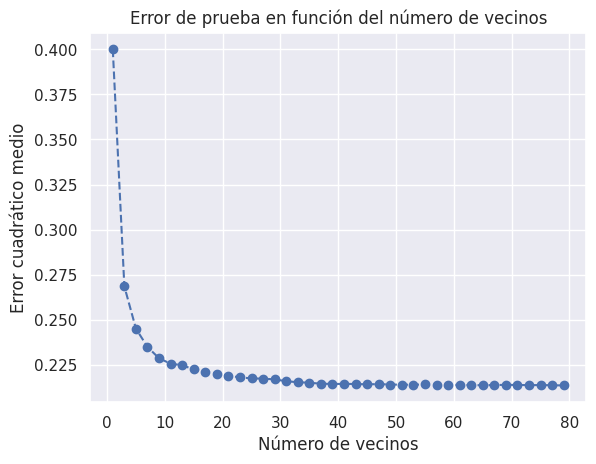

In [51]:
# Graficar los resultados del punto anterior
plt.plot(valores_vecinos, mse_knn,'o',linestyle='dashed')

plt.title('Error de prueba en función del número de vecinos')
plt.xlabel('Número de vecinos')
plt.ylabel('Error cuadrático medio')

### Vecino óptimo

Al mirar la documentación de la función *mean_squared_error* indica que el mejor valor es el **'0.0'**, por lo cual se busca que el error cuadrático medio sea el menor. Al revisar la gráfica vemos que el menor valor se encuentra al tener **79 vecinos**, por lo cual en este caso ese sería el número de vecinos óptimo, pero vemos que luego de los 39 vecinos la mejora es muy poca. Entonces se va a tomar **39 vecinos** porque sería un modelo más simple y menos propenso al sobreajuste.

Ahora se va a evaluar el desempeño del modelo `knn_final` con las siguientes métricas:

* Error cuadrático medio (MSE)
* Raíz del error cuadrático medio (RMSE)
* Error absoluto medio (MAE)
* Coeficiente de determinación ($R^2$)


In [52]:
# Entrenar con 'i' vecinos el conjunto de entrenamiento
knn_final = KNeighborsRegressor(n_neighbors = 39)
knn_final.fit(X_train,y_train)

# Predecir el conjunto de prueba
y_pred = knn_final.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.21437866537520556
Raíz del error cuadrático medio (RMSE): 0.4630104376525496
Error absoluto medio (MAE): 0.4225919215212584
Coeficiente de determinación (R^2): -0.005118264885418666


## Árboles de Decisión

**Un árbol de decisión utiliza una serie de preguntas para dividir los datos y llegar a una clasificación.**

Se va a entrenar el segundo modelo usando el árbol de decisión.

| Ventajas | Desventajas |
|----------|----------|
| **Interpretabilidad:** Se pueden visualizar como diagramas de flujo, lo que facilita entender el proceso de toma de decisiones. Son útiles para explicar los resultados a personas no técnicas. | **Sobreajuste:** Pueden sobreajustarse a los datos de entrenamiento, lo que lleva a un bajo rendimiento en datos nuevos. Para evitar esto, se utilizan técnicas como la poda o el bosque aleatorio. |
| **Versatilidad:** Pueden manejar tanto variables numéricas como categóricas, y pueden utilizarse para problemas de clasificación y regresión. | **Inestabilidad:** Pequeños cambios en los datos pueden resultar en árboles de decisión muy diferentes. |
| **No requieren normalización:** A diferencia de otros algoritmos, los árboles de decisión no requieren que los datos estén normalizados o estandarizados. | **Sesgo:** Los árboles de decisión pueden favorecer atributos con muchos valores posibles, lo que puede llevar a un sesgo en el modelo. |
| **Generación de reglas:** Los árboles de decisión pueden generar reglas claras y concisas, lo que facilita la extracción de conocimiento a partir de los datos. | **Dificultad para representar relaciones no lineales complejas:** Los árboles de decisión pueden tener dificultades para representar relaciones muy complejas. |

**Fuentes:**

*   https://www.ibm.com/es-es/topics/decision-trees
*   https://techntales.medium.com/navigating-the-path-to-understanding-decision-trees-in-machine-learning-63459dc19ef3

### Entrenamiento con los parámetros por defecto

In [118]:
tree = DecisionTreeRegressor(random_state= 5)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [119]:
print(f'La profundidad del modelo tree fue de: {tree.get_depth()}')

La profundidad del modelo tree fue de: 8


Según la documentación estos son los parámetros por defecto:

|Parámetro|Valor por defecto|Explicación|
|----------|----------|----------|
|criterion|'gini' (clasificación), 'squared_error' (regresión)|	Función para medir la calidad de una división. 'gini' para impureza de Gini (clasificación) y 'squared_error' para error cuadrático medio (regresión).|
|splitter|'best'|Estrategia para elegir la división en cada nodo. 'best' elige la mejor división entre todas las características, mientras que 'random' elige una característica aleatoria para dividir.|
|max_depth|None|Profundidad máxima del árbol. None significa que el árbol puede crecer hasta que todas las hojas sean puras o hasta que contengan menos de min_samples_split muestras.|
|min_samples_split|2|Número mínimo de muestras requeridas para dividir un nodo interno.|
|min_samples_leaf|1|Número mínimo de muestras requeridas en un nodo hoja.|
|min_weight_fraction_leaf|0.0|Fracción mínima de la suma total de pesos (de todas las muestras de entrada) requeridas en un nodo hoja.|
|max_features|None|Número máximo de características a considerar al buscar la mejor división. None significa considerar todas las características.|
|random_state|None|Semilla aleatoria para hacer que la división sea reproducible.|
|max_leaf_nodes|None|Número máximo de nodos hoja. None significa que no hay límite.|
|min_impurity_decrease|0.0|Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.|
|class_weight|None|Pesos asociados con las clases (solo para clasificación).|
|ccp_alpha|0.0|Parámetro de complejidad utilizado para la poda de costo-complejidad.|

Ahora se va a evaluar el desempeño del modelo `tree` con el conjunto de prueba a través del error cuadrático medio (MSE) y el coeficiente de determinación ($R^2$).

In [120]:
# Predecir el conjunto de prueba
y_pred = tree.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.0004758505829169641
Coeficiente de determinación (R^2): 0.997661810063789


### Entrenamiento con experimentación de los parámetros

In [121]:
# Lista vacía para almacenar los errores
mse_tree = []
# Lista con los valores de profundidad, valores de 1 a 40
valores_profundidad = range(1,40,1)

for profundidad in valores_profundidad:
  tree = DecisionTreeRegressor(max_depth = profundidad)
  tree.fit(X_train,y_train)
  y_pred = tree.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  mse_tree.append(error)

In [122]:
print('MSE del modelo')
print(mse_tree[15])
print(mse_tree[20])
print(mse_tree[25])
print(mse_tree[31])
print(mse_tree[38])

MSE del modelo
0.0004758505829169641
0.00023792529145848205
0.0004758505829169641
0.00023792529145848205
0.0004758505829169641


Text(0, 0.5, 'Error cuadrático medio')

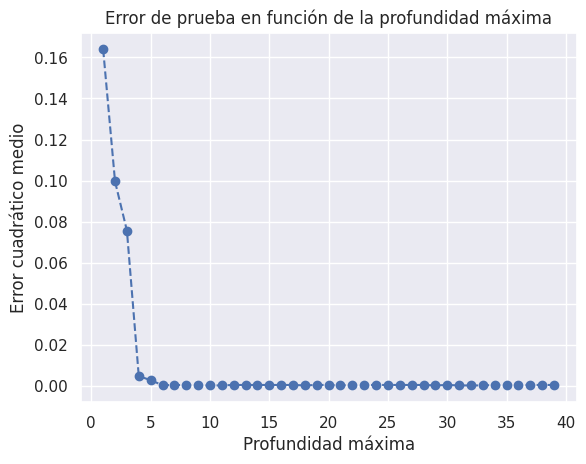

In [123]:
# Graficar los resultados del punto anterior
plt.plot(valores_profundidad, mse_tree,'o',linestyle='dashed')

plt.title('Error de prueba en función de la profundidad máxima')
plt.xlabel('Profundidad máxima')
plt.ylabel('Error cuadrático medio')

### Profundidad óptima

Al mirar la documentación de la función *mean_squared_error* indica que el mejor valor es el **'0.0'**, por lo cual se busca que el error cuadrático medio sea el menor. Al revisar la gráfica vemos que el menor valor se encuentra al tener **39 niveles**, por lo cual en este caso ese sería el número de niveles óptimo.

Ahora se va a evaluar el desempeño del modelo `tree_final` con las siguientes métricas:

* Error cuadrático medio (MSE)
* Raíz del error cuadrático medio (RMSE)
* Error absoluto medio (MAE)
* Coeficiente de determinación ($R^2$)

In [124]:
# Entrenar con 'i' niveles el conjunto de entrenamiento
tree_final = DecisionTreeRegressor(max_depth = 39)
tree_final.fit(X_train,y_train)

# Predecir el conjunto de prueba
y_pred = tree_final.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.0004758505829169641
Raíz del error cuadrático medio (RMSE): 0.02181399970012295
Error absoluto medio (MAE): 0.0004758505829169641
Coeficiente de determinación (R^2): 0.997661810063789


### Variables importantes para el modelo

In [125]:
importancia = tree_final.feature_importances_
print(importancia)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.48185083e-01
 4.51378736e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.36180540e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


Text(0, 0.5, 'Variables predictoras')

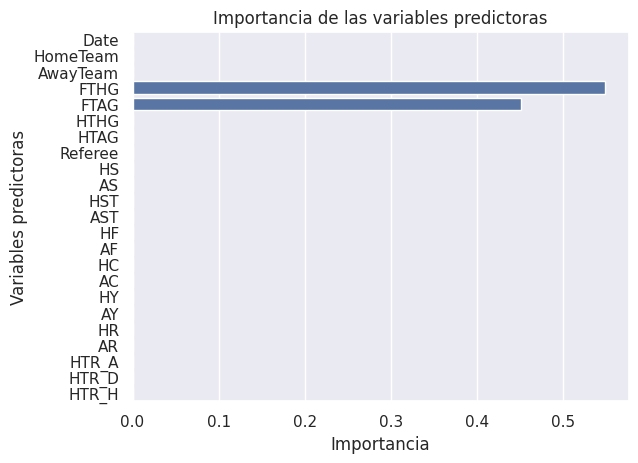

In [126]:
# Graficar los resultados del punto anterior
sns.barplot(x = importancia,y = list(X_train.columns))

plt.title('Importancia de las variables predictoras')
plt.xlabel('Importancia')
plt.ylabel('Variables predictoras')

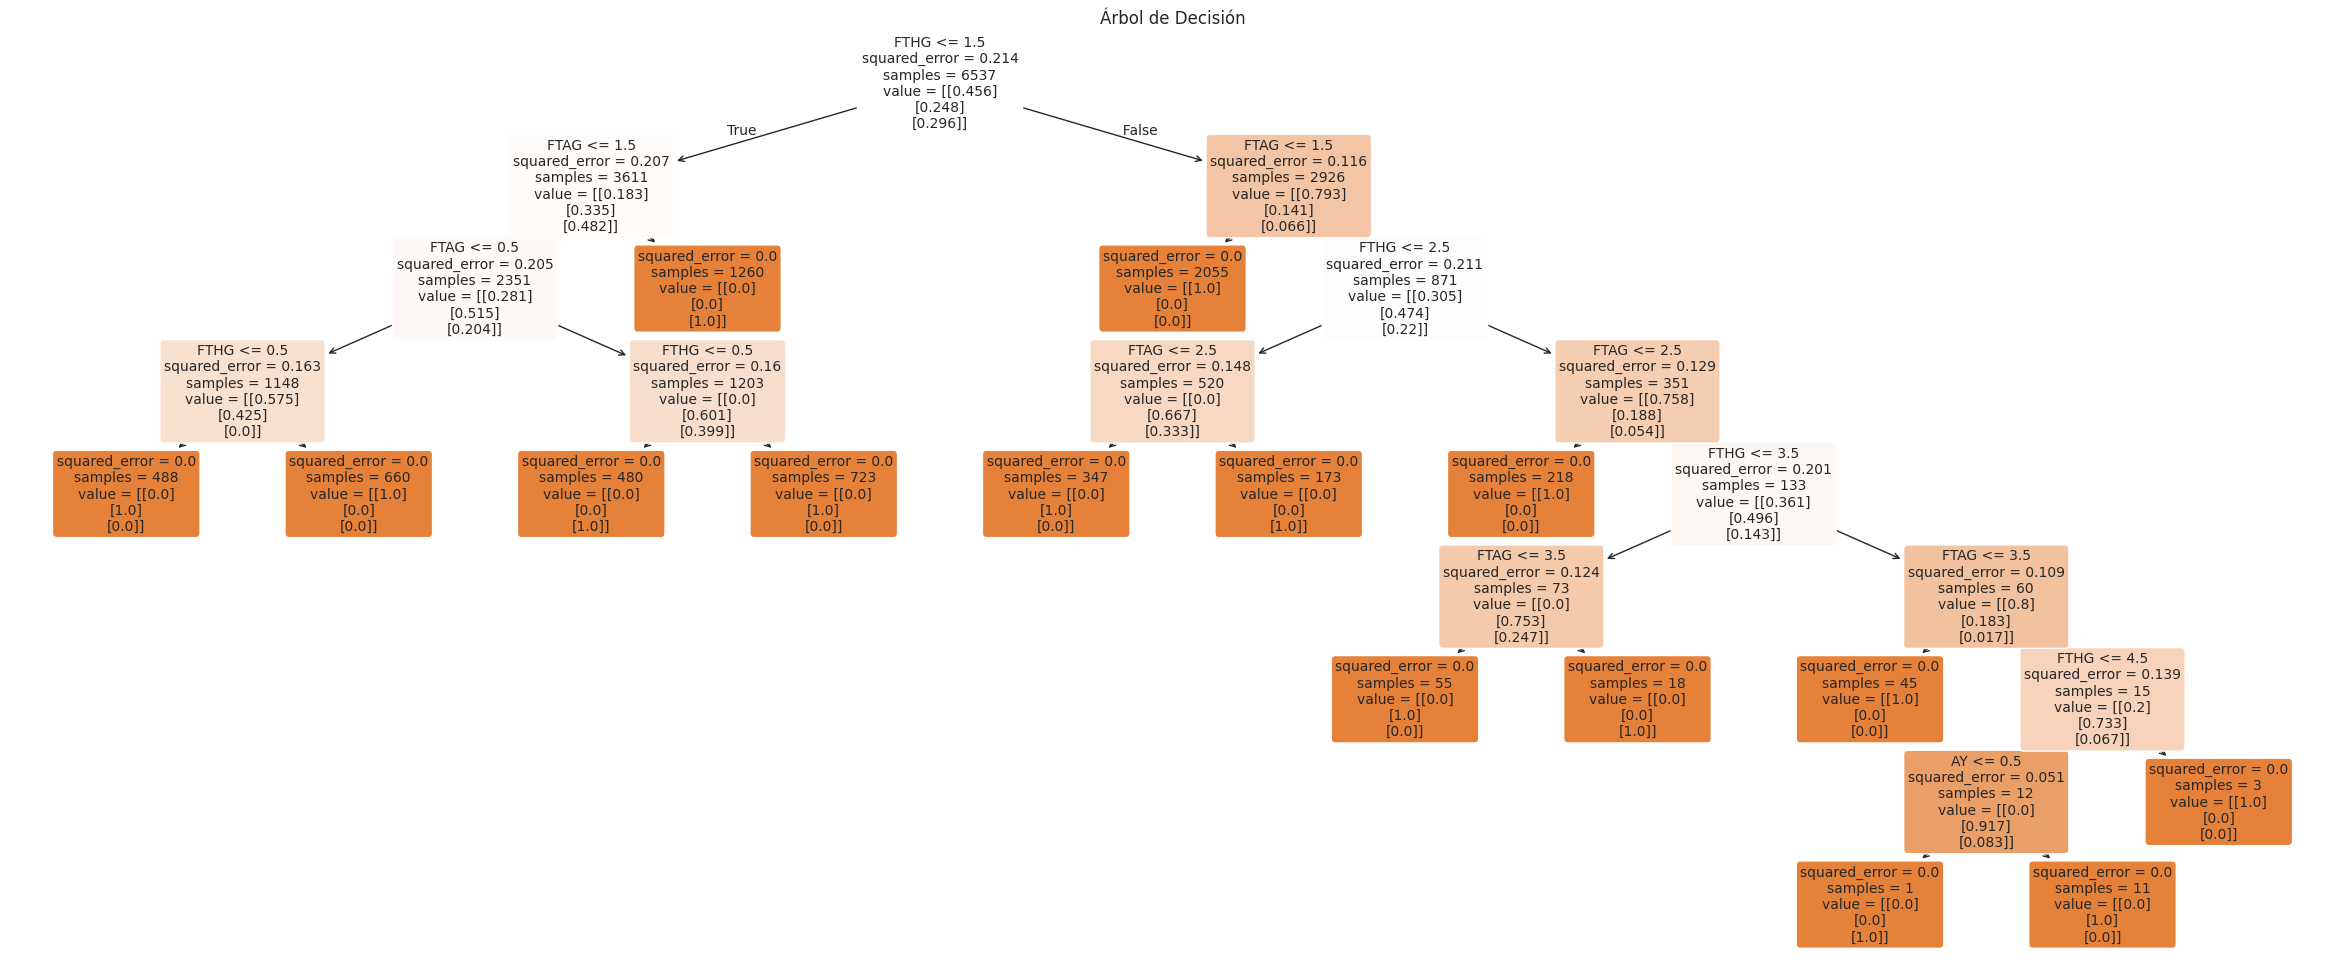

In [127]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Dibujar árbol de decisión
plt.figure(figsize=(30, 12))
plot_tree(tree_final,
          feature_names=X_train.columns,  # Características del dataset
          filled=True,  # Rellena los nodos con colores
          rounded=True,  # Redondea las esquinas de los nodos
          fontsize=10)  # Ajusta el tamaño de la fuente
plt.title("Árbol de Decisión")
plt.show()

Revisando la importancia de las variables se puede ver que seleccionó 2 **FTHG y FTAG** que son los goles del equipo local y visitante respectivamente, también en la gráfica se ve la variable **AY** que son las tarjetas amarillas del equipo visitante, las demás varibles no son consideradas.

Las 2 variables de importancia son los goles de ambos equipos, esto coincide con la lógica para determinar el resultado de un partido, al tomarse estos 2 valores el MSE es cercano a 0 y el coeficiente R^2 cercano a 1 siendo bastante preciso en determinar el resultado.

*   **Error cuadrático medio (MSE):** 0.0004758505829169641
*   **Coeficiente de determinación (R^2):** 0.997661810063789

## Random Forest

**Random Forest combina varios árboles de decisión para obtener una predicción más robusta y precisa.**

Se va a entrenar el tercer modelo usando random forest.

| Ventajas | Desventajas |
|----------|----------|
| **Alta precisión:** Suele ser muy preciso. Es uno de los algoritmos de aprendizaje automático más precisos disponibles. | **Complejo:** Es un algoritmo complejo. Puede ser difícil entender cómo funciona el modelo y cómo se hacen las predicciones. |
| **Robusto al sobreajuste:** Es relativamente robusto al sobreajuste, especialmente cuando el número de árboles en el bosque es grande. | **Costoso computacionalmente:** Puede ser costoso computacionalmente de entrenar, especialmente cuando el número de árboles en el bosque es grande. |
| **Maneja valores perdidos:** Puede manejar valores perdidos en los datos. Puede imputar los valores perdidos o usar los valores perdidos como un valor separado. | **No es tan interpretable como algunos otros modelos:** No es tan interpretable como algunos otros modelos de aprendizaje automático, como los árboles de decisión. Puede ser difícil entender por qué el modelo hace ciertas predicciones. |

**Fuentes:**

*   https://www.ibm.com/think/topics/random-forest
*   https://www.coursera.org/articles/advantages-and-disadvantages-of-random-forest

### Entrenamiento con los parámetros por defecto

In [79]:
random = RandomForestClassifier()
random.fit(X_train,y_train)

RandomForestClassifier()

Según la documentación estos son los parámetros por defecto:

|Parámetro|Valor por defecto|Explicación|
|----------|----------|----------|
|n_estimators|100|Número de árboles en el bosque.|
|criterion|'gini'|Función para medir la calidad de una división. 'gini' para el índice de Gini o 'entropy' para la ganancia de información.|
|max_depth|None|Profundidad máxima de cada árbol. None significa que los nodos se expanden hasta que todas las hojas son puras o hasta que todas las hojas contienen menos de min_samples_split muestras.|
|min_samples_split|2|El número mínimo de muestras requeridas para dividir un nodo interno.|
|min_samples_leaf|1|El número mínimo de muestras requeridas para ser una hoja.|
|min_weight_fraction_leaf|0.0|La fracción mínima del peso total de la suma de las muestras (de todas las clases) requerida para ser una hoja. Las muestras tienen pesos iguales cuando class_weight=None.|
|max_features|'sqrt'|Número de características a considerar al buscar la mejor división. 'sqrt' para la raíz cuadrada del número total de características, 'log2' para el logaritmo base 2 del número total de características, None para usar todas las características, o un entero para especificar un número fijo de características.|
|max_leaf_nodes|None|Máximo número de hojas. None significa un crecimiento ilimitado.|
|min_impurity_decrease|0.0|Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.|
|bootstrap|True|Si las muestras se extraen con reemplazo al construir árboles (bagging).|
|oob_score|False|Si se usa muestras fuera de la bolsa para estimar la precisión de generalización.|
|n_jobs|None|El número de trabajos para ejecutar en paralelo. None significa 1 a menos que en un joblib.parallel_backend contexto. -1 significa usar todos los procesadores.|
|random_state|None|Controla la aleatoriedad del proceso de bootstrapping y la selección de características en cada nodo.|
|verbose|0|Controla la verbosidad del proceso de ajuste.|
|warm_start|False|Cuando se establece en True, reutiliza la solución del ajuste anterior para ajustarse e agrega más estimadores al conjunto, en lugar de ajustarse desde cero.|
|class_weight|None|Pesos asociados a las clases. Si es None, todas las clases tienen peso uno.|
|ccp_alpha|0.0|Parámetro de complejidad utilizado para la poda de costo mínimo-complejidad.|
|max_samples|None|Si bootstrap es True, el número de muestras a extraer de X para entrenar cada árbol base.|

Ahora se va a evaluar el desempeño del modelo `random forest` con el conjunto de prueba a través del error cuadrático medio (MSE) y el coeficiente de determinación ($R^2$).

In [80]:
# Predecir el conjunto de prueba
y_pred = random.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.006661908160837497
Coeficiente de determinación (R^2): 0.9665888698584638


### Entrenamiento con experimentación de los parámetros

In [106]:
# Lista vacía para almacenar los errores
mse_random = []
# Lista con los valores de números de árboles, valores de 1 a 500 de a 20 valores
valores_arboles = range(1,500,20)

for arboles in valores_arboles:
  random = RandomForestClassifier(n_estimators = arboles)
  random.fit(X_train,y_train)
  y_pred = random.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  mse_random.append(error)

In [354]:
print('MSE del modelo')
for i in range(len(mse_random)):
  print(mse_random[i])

MSE del modelo
0.07304306447775398
0.013442778967404236
0.009160123721151558
0.008327385201046872
0.007375684035212943
0.009041161075422318
0.007732571972400665
0.007137758743754461
0.007018796098025221
0.007256721389483703
0.007137758743754462
0.006542945515108256
0.007375684035212943
0.0076136093266714255
0.007137758743754462
0.0073756840352129415
0.007494646680942183
0.007494646680942184
0.007137758743754462
0.007256721389483703
0.006780870806566738
0.007375684035212943
0.007494646680942184
0.0073756840352129415
0.0073756840352129415


Text(0, 0.5, 'Error cuadrático medio')

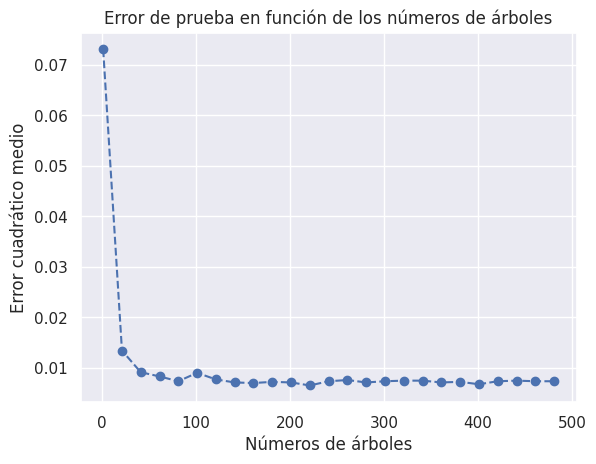

In [113]:
# Graficar los resultados del punto anterior
plt.plot(valores_arboles, mse_random,'o',linestyle='dashed')

plt.title('Error de prueba en función de los números de árboles')
plt.xlabel('Números de árboles')
plt.ylabel('Error cuadrático medio')

### Números de árboles óptimo

Al mirar la documentación de la función *mean_squared_error* indica que el mejor valor es el **'0.0'**, por lo cual se busca que el error cuadrático medio sea el menor. Al revisar la gráfica vemos que el menor valor se encuentra al tener **221 árboles**, por lo cual en este caso ese sería el número de árboles óptimo.

Ahora se va a evaluar el desempeño del modelo `random_final` con las siguientes métricas:

* Error cuadrático medio (MSE)
* Raíz del error cuadrático medio (RMSE)
* Error absoluto medio (MAE)
* Coeficiente de determinación ($R^2$)

In [115]:
# Entrenar con 'i' niveles el conjunto de entrenamiento
random_final = RandomForestClassifier(n_estimators = 221)
random_final.fit(X_train,y_train)

# Predecir el conjunto de prueba
y_pred = random_final.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.007494646680942185
Raíz del error cuadrático medio (RMSE): 0.08657162745924432
Error absoluto medio (MAE): 0.007494646680942185
Coeficiente de determinación (R^2): 0.9629414838945664


### Variables importantes para el modelo

In [165]:
importancia = random_final.feature_importances_
print(importancia)

[0.02237414 0.01854206 0.01810816 0.30195649 0.27452629 0.03142091
 0.03245951 0.01916679 0.01997318 0.02002957 0.02688224 0.0248295
 0.015866   0.01605998 0.01491445 0.01437139 0.01017742 0.01059612
 0.00293907 0.00253582 0.04000463 0.01629663 0.04596965]


Text(0, 0.5, 'Variables predictoras')

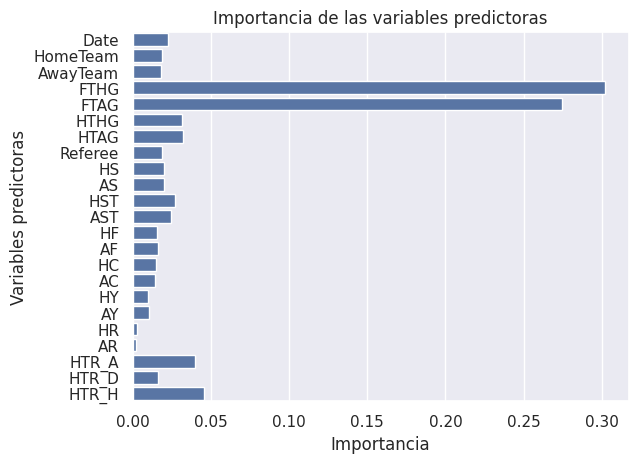

In [166]:
# Graficar los resultados del punto anterior
sns.barplot(x = importancia,y = list(X_train.columns))

plt.title('Importancia de las variables predictoras')
plt.xlabel('Importancia')
plt.ylabel('Variables predictoras')

Revisando la importancia de las variables se puede ver que seleccionó 2 variables como las más importantes **FTHG y FTAG** que son los goles del equipo local y visitante respectivamente, las demás varibles tienen menos importancia como se muestra en la grafica.

Las 2 variables de importancia son los goles de ambos equipos, esto coincide con la lógica para determinar el resultado de un partido, al tomarse estos 2 valores el MSE es cercano a 0 y el coeficiente R^2 cercano a 1 siendo bastante preciso en determinar el resultado.

*   **Error cuadrático medio (MSE):** 0.007494646680942185
*   **Coeficiente de determinación (R^2):** 0.9629414838945664

## Análisis modelos de entrenamiento

Para la variable objetivo **'FTR'** se realizaron 3 modelos diferentes y se calcularon diferentes errores para determinar cual es mejor modelo para el dataset y variable objetivo:

* Error cuadrático medio (MSE)
* Error absoluto medio (MAE)
* Coeficiente de determinación ($R^2$)

|Métrica|Vecinos más cercanos|Árbol de Decisión|Random Forest|
|---|---|---|---|
|Error cuadrático medio (MSE)|0.21437866537520556|0.0004758505829169641|0.007494646680942185|
|Error absoluto medio (MAE)|0.4225919215212584|0.0004758505829169641|0.007494646680942185|
|Coeficiente de determinación ($R^2$)|-0.005118264885418666|0.997661810063789|0.9629414838945664|

Según la teoría para cada para cada métrica esta lo siguiente:
*   **Error cuadrático medio:** Un MSE más bajo indica un mejor ajuste del modelo a los datos.
*   **Error absoluto medio:** Un MAE más bajo indica un mejor ajuste del modelo a los datos.
*   **Coeficiente de determinación:** Varía entre 0 y 1. Un **R^2 de 1** indica que el modelo explica perfectamente la variabilidad de la variable objetivo. Un **R^2 de 0** indica que el modelo no explica nada de la variabilidad de la variable objetivo.

De acuerdo a las características de cada métrica y revisando la tabla anterior se puede determinar que el mejor modelo para este caso en el de **Árbol de Decisión**, si se revisa el **Random Forest** tiene valores bastante buenos y puede servir también como un modelo valido.

Respecto al modelo **Vecinos más cercanos** está bastante lejos de los valores de los otros 2 modelos por lo cual no es la mejor opción para determinar la variable objetivo.

## Probar el modelo

In [413]:
# Se crea dataset de 20 partidos que se van a probar
nuevos_valores = pd.DataFrame({
    'Date': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'HomeTeam': [43,24,0,43,26,24,0,40,10,0,6,9,24,36,45,26,15,40,1,18],
    'AwayTeam': [23,26,1,29,43,18,40,36,29,10,31,17,21,29,0,13,8,23,43,27],
    'FTHG': [0,3,1,1,2,0,1,1,1,3,5,0,4,1,0,3,1,1,1,0],
    'FTAG': [1,2,0,0,1,1,1,0,2,1,0,1,1,3,1,1,2,2,1,1],
    'HTHG': [0,1,0,0,1,0,0,1,1,1,1,0,3,1,0,1,0,1,1,0],
    'HTAG': [0,0,0,0,0,1,0,0,2,0,0,1,0,2,0,1,0,0,0,0],
    'Referee': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'HS': [17,14,16,11,22,18,16,9,14,16,16,16,16,12,9,15,16,15,14,9],
    'AS': [4,9,8,12,6,7,6,7,17,8,18,3,3,17,9,10,13,12,14,4],
    'HST': [12,8,10,4,17,5,6,4,4,6,10,1,6,5,4,6,5,6,4,3],
    'AST': [2,7,3,5,3,4,4,3,3,5,4,1,3,9,3,4,6,3,4,1],
    'HF': [16,17,12,15,11,11,7,15,6,8,9,8,10,10,20,6,8,6,13,7],
    'AF': [14,17,20,10,13,7,16,9,11,9,12,11,11,5,10,8,11,16,16,9],
    'HC': [11,9,7,3,9,5,15,10,5,3,3,9,3,3,1,2,4,6,4,3],
    'AC': [5,4,4,8,3,4,5,5,5,3,9,1,4,8,5,4,7,4,3,0],
    'HY': [3,3,1,3,2,0,3,2,0,0,2,3,0,1,0,3,2,1,2,0],
    'AY': [3,4,4,2,0,0,6,1,1,1,3,4,2,0,1,2,2,5,3,1],
    'HR': [1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0],
    'AR': [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    'HTR_A': [0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0],
    'HTR_D': [1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1],
    'HTR_H': [0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0]
})

print('Resultados esperados')
resultados_esperados = pd.DataFrame({
    'FTR_H': [0,1,1,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0],
    'FTR_D': [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0],
    'FTR_A': [1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,0,1]
})
print(resultados_esperados)
print('--------------------------------------')

# Se hace la predicción de las variables objetivo con el dataset creado
prediccion = tree_final.predict(nuevos_valores)
prediccion = pd.DataFrame(prediccion,columns=['FTR_H', 'FTR_D', 'FTR_A'])
prediccion = prediccion.applymap(int)
print('Resultados predichos')
print(prediccion)

Resultados esperados
    FTR_H  FTR_D  FTR_A
0       0      0      1
1       1      0      0
2       1      0      0
3       1      0      0
4       1      0      0
5       0      0      1
6       0      1      0
7       1      0      0
8       0      0      1
9       1      0      0
10      1      0      0
11      0      0      1
12      1      0      0
13      0      0      1
14      0      0      1
15      1      0      0
16      0      0      1
17      0      0      1
18      0      1      0
19      0      0      1
--------------------------------------
Resultados predichos
    FTR_H  FTR_D  FTR_A
0       0      0      1
1       1      0      0
2       1      0      0
3       1      0      0
4       1      0      0
5       0      0      1
6       0      1      0
7       1      0      0
8       0      0      1
9       1      0      0
10      1      0      0
11      0      0      1
12      1      0      0
13      0      0      1
14      0      0      1
15      1      0      0
16     

<ipython-input-413-8c32b9c3ae7c>:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  prediccion = prediccion.applymap(int)


In [414]:
# Transponer para luego comparar resultados de cada partido
# Crea un diccionario con las listas como valores
data_prediccion = {'FTR_H': prediccion['FTR_H'], 'FTR_D': prediccion['FTR_D'], 'FTR_A': prediccion['FTR_A'] }
data_esperados = {'FTR_H': resultados_esperados['FTR_H'], 'FTR_D': resultados_esperados['FTR_D'], 'FTR_A': resultados_esperados['FTR_A']}

# Crea el DataFrame
df_prediccion = pd.DataFrame(data_prediccion)
df_esperados = pd.DataFrame(data_esperados)

# Transpone el DataFrame
df_prediccion_transposed = df_prediccion.T
df_esperados_transposed = df_esperados.T

# Contar de los 20 partidos cuantos el modelo predijo bien
resultados_correctos = 0
for i in range(len(df_esperados_transposed.columns)):
  if df_esperados_transposed[i].equals(df_prediccion_transposed[i]):
    resultados_correctos += 1
print(f'Partidos con resultado correcto {resultados_correctos}')
print(f'Partidos con resultado incorrecto {20-resultados_correctos}')
print(f'Porcentaje de acierto del modelo {(resultados_correctos/20)*100}%')

Partidos con resultado correcto 20
Partidos con resultado incorrecto 0
Porcentaje de acierto del modelo 100.0%


## Análisis del modelo

**Al probar con los 20 partidos seleccionados el modelo predijo el resultado correcto de 20 de ellos, teniendo un 100% de efectividad en el resultado.**

**Nota:** Se realizó esta misma prueba con el algoritmo random forest y el resultado fue el mismo, 20 correctas.

# Prueba con otras variables objetivo resultado del partido y goles de local y visitante

En la fase anterior se realizón el modelado sobre la variable objetivo **'FTR'** que es el resultado del partido. Del mejor modelo encontrado de **Árbol de decisión** se revisaron las variables importantes del modelo y se encontraron 2 'FTHG' y 'FTAG' que son los goles del equipo local y visitante, para el **Random Forest** estas 2 fueron también las más importantes y se tuvieron en cuenta las demás del dataset.

**La importancia de estas variables nos muestra algo obvio acerca de un partido de fútbol, los goles determinan el resultado. El equipo que meta más goles es el ganador, si meten igual cantidad de goles es un empate.**

Con esta información se pueden solucionar algunas preguntas, pero otras de las propuestas no son posibles por lo cual se puede replantear la variable objetivo y volver a modelar para obtener más información.

## Nuevas variables objetivo

Para el nuevo modelamiento se tomarán como variables objetivo 'FTR' como en el modelo anterior, 'FTHG' y 'FTAG'. A continuación se realizaráel proceso de modelamiento para solo 1 metodo el cual es Random Forest.

## Preparación y modelamiento

### Partición del dataset: Subconjuntos de prueba y entrenamiento

In [420]:
columnas_entrenar = ['FTHG', 'FTAG', 'FTR_A', 'FTR_D', 'FTR_H']
columnas_sin_entrenar = ['FTHG', 'FTAG', 'FTR_A', 'FTR_D', 'FTR_H', 'Date', 'Referee']
# Se divide el dataset en datos de entrenamiento y de prueba con train_test_split()
train_goles, test_goles = sklearn.model_selection.train_test_split(dataset_EPL_transformed,test_size = 0.3,random_state = 0)

# Se divide en un grupo sin la variable objetivo y otro solo con la variable objetiva
# Se hace para los datos de entrenamiento y prueba
# Variables predictoras
X_train_goles = train_goles.drop(columns=columnas_sin_entrenar,axis = 1)
# Variable objetivo
y_train_goles = train_goles[columnas_entrenar]

print(f'Dimensiones de X de entrenamiento: {X_train_goles.shape}')
print(f'Dimensiones de y de entrenamiento: {y_train_goles.shape}')

X_test_goles = test_goles.drop(columns=columnas_sin_entrenar,axis = 1)
y_test_goles = test_goles[columnas_entrenar]

print(f'Dimensiones de X de prueba: {X_test_goles.shape}')
print(f'Dimensiones de y de prueba: {y_test_goles.shape}')

Dimensiones de X de entrenamiento: (6537, 19)
Dimensiones de y de entrenamiento: (6537, 5)
Dimensiones de X de prueba: (2802, 19)
Dimensiones de y de prueba: (2802, 5)


### Entrenamiento con los parámetros por defecto

In [421]:
random_goles = RandomForestClassifier()
random_goles.fit(X_train_goles,y_train_goles)

RandomForestClassifier()

In [422]:
# Predecir el conjunto de prueba
y_pred_goles = random_goles.predict(X_test_goles)

# Calcular las métricas
mse = mean_squared_error(y_test_goles, y_pred_goles)
r2 = r2_score(y_test_goles, y_pred_goles)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.5524625267665952
Coeficiente de determinación (R^2): 0.1147461691372897


### Entrenamiento con experimentación de los parámetros

In [423]:
# Lista vacía para almacenar los errores
mse_random_goles = []
# Lista con los valores de números de árboles, valores de 1 a 500 de a 20 valores
valores_arboles_goles = range(1,500,50)

for arboles in valores_arboles_goles:
  random_goles = RandomForestClassifier(n_estimators = arboles)
  random_goles.fit(X_train_goles,y_train_goles)
  y_pred_goles = random_goles.predict(X_test_goles)
  error = mean_squared_error(y_test_goles, y_pred_goles)
  mse_random_goles.append(error)

In [429]:
print('MSE del modelo')
for i in range(len(mse_random_goles)):
  print(mse_random_goles[i])

MSE del modelo
0.7515346181299073
0.5559600285510349
0.5635260528194147
0.5586009992862241
0.545467523197716
0.5502498215560314
0.5461812990720913
0.5536759457530336
0.5543183440399715
0.5473947180585296


Text(0, 0.5, 'Error cuadrático medio')

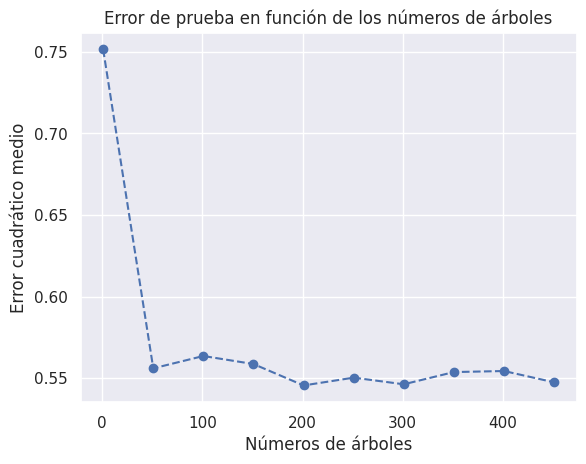

In [430]:
# Graficar los resultados del punto anterior
plt.plot(valores_arboles_goles, mse_random_goles,'o',linestyle='dashed')

plt.title('Error de prueba en función de los números de árboles')
plt.xlabel('Números de árboles')
plt.ylabel('Error cuadrático medio')

### Número de árboles óptimo

In [431]:
# Entrenar con 'i' niveles el conjunto de entrenamiento
random_final_goles = RandomForestClassifier(n_estimators = 201)
random_final_goles.fit(X_train_goles,y_train_goles)

# Predecir el conjunto de prueba
y_pred_goles = random_final_goles.predict(X_test_goles)

# Calcular las métricas
mse = mean_squared_error(y_test_goles, y_pred_goles)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_goles, y_pred_goles)
r2 = r2_score(y_test_goles, y_pred_goles)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.5475374732334046
Raíz del error cuadrático medio (RMSE): 0.7399577509786655
Error absoluto medio (MAE): 0.3903640256959315
Coeficiente de determinación (R^2): 0.1227553656855265


### Variables importantes para el modelo

In [432]:
importancia_goles = random_final_goles.feature_importances_
print(importancia)

[0.07359567 0.06264766 0.06233009 0.04545189 0.04747479 0.06546357
 0.06003858 0.0593407  0.06596858 0.06053289 0.05559583 0.05655363
 0.05227015 0.04959805 0.03561795 0.03820826 0.0070641  0.00768097
 0.03568628 0.01836246 0.04051792]


Text(0, 0.5, 'Variables predictoras')

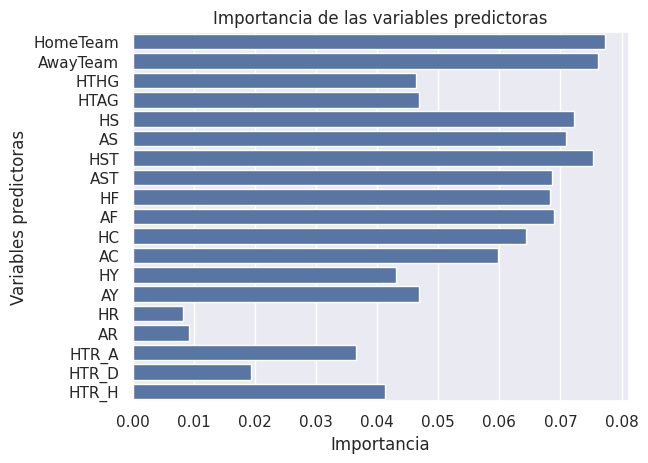

In [433]:
# Graficar los resultados del punto anterior
sns.barplot(x = importancia_goles,y = list(X_train_goles.columns))

plt.title('Importancia de las variables predictoras')
plt.xlabel('Importancia')
plt.ylabel('Variables predictoras')

### Probar el modelo

Para probar el modelo se tomaron 10 registros aleatorios del dataset y otros 10 que no se incluyeron dentro del dataset los cuales corresponden a las fechas del 25 y 26 de enero del 2025.

Los datos seleccionados son los siguientes:

**Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR**
*   23/08/00,West Ham,Leicester,0,1,A,0,0,D,Rob Styles,17,4,12,2,16,14,11,5,3,3,1,0
*   09/09/00,Liverpool,Man City,3,2,H,1,0,H,Graham Barber,14,9,8,7,17,17,9,4,3,4,0,0
*   14/10/00,Arsenal,Aston Villa,1,0,H,0,0,D,Rob Harris,16,8,10,3,12,20,7,4,1,4,0,1
*   28/10/00,West Ham,Newcastle,1,0,H,0,0,D,Mike Riley,11,12,4,5,15,10,3,8,3,2,0,0
*   16/10/05,Man City,West Ham,2,1,H,1,0,H,M Clattenburg,22,6,17,3,11,13,9,3,2,0,0,0
*   01/05/12,Liverpool,Fulham,0,1,A,0,1,A,L Probert,18,7,5,4,11,7,5,4,0,0,0,0
*   27/09/14,Arsenal,Tottenham,1,1,D,0,0,D,M Oliver,16,6,6,4,7,16,15,5,3,6,0,0
*   05/10/14,Tottenham,Southampton,1,0,H,1,0,H,M Jones,9,7,4,3,15,9,10,5,2,1,0,0
*   26/11/18,Burnley,Newcastle,1,2,A,1,2,A,A Taylor,14,17,4,3,6,11,5,5,0,1,0,0
*   11/11/23,Arsenal,Burnley,3,1,H,1,0,H,M Oliver,16,8,6,5,8,9,3,3,0,1,1,0
*   25/01/25,Bournemouth,Nott'm Forest,5,0,H,1,0,H,C Pawson,16,18,10,4,9,12,3,9,2,3,0,0
*   25/01/25,Brighton,Everton,0,1,A,0,1,A,T Robinson,16,3,1,1,8,11,9,1,3,4,0,0
*   25/01/25,Liverpool,Ipswich,4,1,H,3,0,H,M Salisbury,16,3,6,3,10,11,3,4,0,2,0,0
*   25/01/25,Southampton,Newcastle,1,3,A,1,2,A,S Barrott,12,17,5,9,10,5,3,8,1,0,0,0
*   25/01/25,Wolves,Arsenal,0,1,A,0,0,D,M Oliver,9,9,4,3,20,10,1,5,0,1,1,1
*   25/01/25,Man City,Chelsea,3,1,H,1,1,D,J Brooks,15,10,6,4,6,8,2,4,3,2,0,0
*   26/01/25,Crystal Palace,Brentford,1,2,A,0,0,D,T Harrington,16,13,5,6,8,11,4,7,2,2,0,0
*   26/01/25,Tottenham,Leicester,1,2,A,1,0,H,R Jones,15,12,6,3,6,16,6,4,1,5,0,0
*   26/01/25,Aston Villa,West Ham,1,1,D,1,0,H,P Bankes,14,14,4,4,13,16,4,3,2,3,0,0
*   26/01/25,Fulham,Man United,0,1,A,0,0,D,A Taylor,9,4,3,1,7,9,3,0,0,1,0,0

Se acomodan estos valores en un nuevo dataset con las transformaciones realizadas en la fase 2 y se prueba el modelo con estos datos.

In [434]:
# Se crea dataset de 20 partidos que se van a probar
nuevos_valores = pd.DataFrame({
    'HomeTeam': [43,24,0,43,26,24,0,40,10,0,6,9,24,36,45,26,15,40,1,18],
    'AwayTeam': [23,26,1,29,43,18,40,36,29,10,31,17,21,29,0,13,8,23,43,27],
    'HTHG': [0,1,0,0,1,0,0,1,1,1,1,0,3,1,0,1,0,1,1,0],
    'HTAG': [0,0,0,0,0,1,0,0,2,0,0,1,0,2,0,1,0,0,0,0],
    'HS': [17,14,16,11,22,18,16,9,14,16,16,16,16,12,9,15,16,15,14,9],
    'AS': [4,9,8,12,6,7,6,7,17,8,18,3,3,17,9,10,13,12,14,4],
    'HST': [12,8,10,4,17,5,6,4,4,6,10,1,6,5,4,6,5,6,4,3],
    'AST': [2,7,3,5,3,4,4,3,3,5,4,1,3,9,3,4,6,3,4,1],
    'HF': [16,17,12,15,11,11,7,15,6,8,9,8,10,10,20,6,8,6,13,7],
    'AF': [14,17,20,10,13,7,16,9,11,9,12,11,11,5,10,8,11,16,16,9],
    'HC': [11,9,7,3,9,5,15,10,5,3,3,9,3,3,1,2,4,6,4,3],
    'AC': [5,4,4,8,3,4,5,5,5,3,9,1,4,8,5,4,7,4,3,0],
    'HY': [3,3,1,3,2,0,3,2,0,0,2,3,0,1,0,3,2,1,2,0],
    'AY': [3,4,4,2,0,0,6,1,1,1,3,4,2,0,1,2,2,5,3,1],
    'HR': [1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0],
    'AR': [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    'HTR_A': [0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0],
    'HTR_D': [1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1],
    'HTR_H': [0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0]
})

print('Resultados esperados')
resultados_esperados = pd.DataFrame({
    'FTHG': [0,3,1,1,2,0,1,1,1,3,5,0,4,1,0,3,1,1,1,0],
    'FTAG': [1,2,0,0,1,1,1,0,2,1,0,1,1,3,1,1,2,2,1,1],
    'FTR_A': [1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,0,1],
    'FTR_D': [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0],
    'FTR_H': [0,1,1,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0]
})
print(resultados_esperados)
print('--------------------------------------')

# Se hace la predicción de las variables objetivo con el dataset
prediccion = random_final_goles.predict(nuevos_valores)
prediccion = pd.DataFrame(prediccion,columns=['FTHG', 'FTAG', 'FTR_A', 'FTR_D', 'FTR_H'])
print('Resultados predichos')
print(prediccion)

Resultados esperados
    FTHG  FTAG  FTR_A  FTR_D  FTR_H
0      0     1      1      0      0
1      3     2      0      0      1
2      1     0      0      0      1
3      1     0      0      0      1
4      2     1      0      0      1
5      0     1      1      0      0
6      1     1      0      1      0
7      1     0      0      0      1
8      1     2      1      0      0
9      3     1      0      0      1
10     5     0      0      0      1
11     0     1      1      0      0
12     4     1      0      0      1
13     1     3      1      0      0
14     0     1      1      0      0
15     3     1      0      0      1
16     1     2      1      0      0
17     1     2      1      0      0
18     1     1      0      1      0
19     0     1      1      0      0
--------------------------------------
Resultados predichos
    FTHG  FTAG  FTR_A  FTR_D  FTR_H
0      1     0      0      0      0
1      3     2      0      0      1
2      1     0      0      0      1
3      1     0     

Luego de predecir con el modelo entrenado se van a comparar los resultados de los partidos dado por el modelo contra el resultado real.

In [435]:
# Transponer para luego comparar resultados de cada partido
# Crea un diccionario con las listas como valores
data_prediccion = {'FTR_A': prediccion['FTR_A'], 'FTR_D': prediccion['FTR_D'], 'FTR_H': prediccion['FTR_H']}
data_esperados = {'FTR_A': resultados_esperados['FTR_A'], 'FTR_D': resultados_esperados['FTR_D'], 'FTR_H': resultados_esperados['FTR_H']}

# Crea el DataFrame
df_prediccion = pd.DataFrame(data_prediccion)
df_esperados = pd.DataFrame(data_esperados)

# Transpone el DataFrame
df_prediccion_transposed = df_prediccion.T
df_esperados_transposed = df_esperados.T

# Contar de los 20 partidos cuantos el modelo predijo bien
resultados_correctos = 0
for i in range(len(df_esperados_transposed.columns)):
  if df_esperados_transposed[i].equals(df_prediccion_transposed[i]):
    resultados_correctos += 1
print(f'Partidos con resultado correcto {resultados_correctos}')
print(f'Partidos con resultado incorrecto {20-resultados_correctos}')
print(f'Porcentaje de acierto del modelo {(resultados_correctos/20)*100}%')

Partidos con resultado correcto 13
Partidos con resultado incorrecto 7
Porcentaje de acierto del modelo 65.0%


### Análisis del modelo

**Al probar con los 20 partidos seleccionados el modelo predijo el resultado correcto de 13 de ellos, teniendo un 65% de efectividad en el resultado.**

**Nota:** En esta parte solo se está comparando el resultado pero no se están validando los goles de local y visitante.

**Observaciones:** Al revisar el resultado de los partidos que predijo el modelo se pueden ver que en 4 de ellos los valores para FTR_A,FTR_D,FTR_H fueron 0 lo cual indica que el modelo no pudo determinar el resultado y no seleccionó ninguno de los 3 posibles resultados. Adicional en algunos de los resultados incorrectos el resultado era correcto.

Esto puede deberse a la cantidad de datos que fueron de 9339, sería interesante contar con más datos y determinar si se mantiene el comportamiento o se soluciona. También puede ser por el modelo seleccionado, puede darse el caso que con otro modelo estos resultados no se presente.

# Análisis general del dataset

**Análisis general del dataset:**

*   **Tipo de problema:** Es de clasificación, ya que se quiere predecir el resultado del partido (FTR) que tiene tres posibles valores: victoria local (H), empate (D) o victoria visitante (A).
*   **Tamaño del dataset:** El dataset tiene 9339 registros y 22 columnas, lo cual es un tamaño moderado.
*   **Características del dataset:** El dataset contiene una mezcla de variables numéricas (goles, tiros, tarjetas) y categóricas (equipos, árbitro).
*   **Objetivos del análisis:** Resolver preguntas de negocio relacionadas con la predicción del resultado de los partidos de fútbol.

# Revisión de preguntas iniciales

*   ¿Cuáles son los equipos más dominantes?
  * **Respuesta:** Durante los distintos análisis realizados se visualiza que siempre dentro del top de equipos que más ganan partidos como local y visitante, y más anotan goles como local y visitante están los siguientes 6 equipos: **Arsenal, Liverpool, Manchester City, Man United, Chelsea y Tottenham**.
*   ¿Qué equipo tiene más probabilidades de ganar un partido dado?
  * **Respuesta:** **Arsenal, Liverpool, Manchester City, Man United, Chelsea y Tottenham**.
*   ¿Qué factores estadísticos son los mejores predictores del resultado de un partido?
  * **Respuesta:** Del primer modelo predictor los factores son **goles de equipo local y visitante**, del segundo modelo predictor vemos que las variables relevantes son **los disparos, tiros a puerta, el equipo y los goles en el descanso**.
*   ¿Cuáles son los equipos más consistentes a lo largo de las temporadas?
  * **Respuesta:** **Arsenal, Liverpool, Manchester City, Man United, Chelsea y Tottenham**.
*   ¿Cómo afecta el calendario de partidos (días de la semana, hora) los resultados?
  * **Respuesta:** Dentro de los análisis realizados no se consideró mucho la fecha del partido, por lo cual no se obtuvo información para responder esta pregunta.
*   ¿Hay alguna ventaja de jugar en casa que vaya más allá de los factores estadísticos? ¿Los equipos suelen obtener mejores resultados cuando juegan en casa?
  * **Respuesta:** Por lo general se ve que los equipos que juegan como local tienen más juegos ganados y más goles. Los equipos que juegan como local tienen más probabilidad de ganar con un valor de %45,48.
*   ¿Qué factores influyen en el número de tarjetas amarillas y rojas?
  * **Respuesta:** Se evidencia que un equipo visitante en promedio tiene más tarjetas amarillas que un local, donde el visitante es 2 y local 1. Además se ve el impacto de una tarjeta roja, el equipo que recibe una roja es el que tiene mas probabildad de perder el partido.
*   ¿Se puede construir un modelo para predecir los resultados de los partidos con una precisión aceptable para las apuestas deportivas?
  * **Respuesta:** El segundo modelo predictor dió un rendimiento del 65% y es un valor aceptable. (Con mas entrenamiento y datos este valor puede subir)
*   **Análisis por temporadas:** Compara el total de goles marcados a lo largo de las temporadas.
  * **Respuesta:** Dentro del proceso de análisis no se hizo distinción entre temporadas por lo cual no se tiene información para responderla
*   **Rendimiento del equipo:** Identificar las tendencias de las victorias locales y visitantes.
  * **Respuesta: Los equipos que juegan como local tienen probabilidad de ganar con un valor de %45,48, mientras los visitantes un %29,38.**
*   **Perspectivas disciplinarias:** Analiza los patrones de tarjetas amarillas/rojas a lo largo del tiempo.
  * **Respuesta:** Un equipo visitante en promedio tiene más tarjetas amarillas que un local.
*   **Predicciones de partidos:** Construye un modelo de aprendizaje automático para predecir resultados.
  * **Respuesta:** Se construyó un modelo con rendimiento del 65% abierto a mejoras y experimentación para aumentar este porcentaje.

Durante los distintos análisis realizados se visualiza que siempre dentro del top de equipos que más ganan partidos como local y visitante, y más anotan goles como local y visitante están los siguientes 6 equipos: **Arsenal, Liverpool, Manchester City, Man United, Chelsea y Tottenham**. Además desde el año 2000 a la actualidad corresponden a los 6 equipos que se han mantenido más tiempo en la primera división de Inglaterra por lo cual han jugado más partidos y tienen las frecuencias más altas.

Otro dato importante son las victorias de los equipos como local y visitante, donde los que tienen más probabilidad de ganar son:
*   **Man United y Arsenal tienen cerca del 70% de probabilidad de ganar como local.**
*   **Man United y Chelsea tienen alrededor del 50% probabilidad de ganar como visitante.**

Por último se ve el impacto de los disparos efectuados por ambos equipos donde:
*   **Equipo local:** Alrededor de 15 disparos.
*   **Equipo visitante:** Alrededor de 10 disparos.

**Notas:**

*   Estos modelos tuvieron una fase de experimentación pero es posible mejorar su rendimiento ajustando parámetros y probando otros modelos.
*   El primer modelo muestra lo obvio del resultado de un partido, el equipo que anote más goles es el ganador, de ahí que las variables importantes son los goles del local y goles del visitante.
*   El segundo modelo determina además del resultado del partido los goles de cada equipo, el primer modelo sirvió de base para la construcción del segundo.